In [2]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
from datetime import timedelta
from missing_imputation import DataImputation
from frequency_estimator import frequency_estimator
from seasonality_trend import SeasonalityDetection
from forecasting import forecasting
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 50
pd.options.display.max_rows = 500

df = pd.read_csv('Filtered_BP_Clusters.csv')
# df = pd.read_csv('top_bp_clus.csv').dropna()
df

Basepack                                          BP Desc  \
0       70354                    70354 : TAAZA LEAF  POLY 250G   
1       80377                          80377 : TAAZA LEAF 100G   
2       70350                         70350 : TAAZA LEAF RS.10   
3       80647   80647 : TZA LF NW BLND 250G PNJBHRYNACHTTSGHMP   
4       70199                 70199 : 3 ROSES DUST CARTON 100G   
5       80647   80647 : TZA LF NW BLND 250G PNJBHRYNACHTTSGHMP   
6       70361                    70361 : TAAZA LEAF  POLY RS.5   
7       70200                 70200 : 3 ROSES DUST CARTON 250G   
8       80377                          80377 : TAAZA LEAF 100G   
9       70283             70283 : RED LABEL LEAF A CARTON 250G   
10      80377                          80377 : TAAZA LEAF 100G   
11      70293             70293 : RED LABEL LEAF B CARTON 100G   
12      70197              70197 : 3 ROSES DUST BRICK PACK 50G   
13      70294             70294 : RED LABEL LEAF B CARTON 250G   
14      70283             70283 : RED LABEL LEAF A CARTON 250G   
15      70293             70293 : RED LABEL LEAF B CARTON 100G   
16      70219                  70219 : 3 ROSES DUST POLY RS.10   
17      80377                          80377 : TAAZA LEAF 100G   
18      70293             70293 : RED LABEL LEAF B CARTON 100G   
19      70298                 70298 : RED LABEL LEAF POLY 250G   
20      70369               70369 : TAJ MAHAL LEAF CARTON 250G   
21      70294             70294 : RED LABEL LEAF B CARTON 250G   
22      70367               70367 : TAJ MAHAL LEAF CARTON 100G   
23      70200                 70200 : 3 ROSES DUST CARTON 250G   
24      80377                          80377 : TAAZA LEAF 100G   
25      70199                 70199 : 3 ROSES DUST CARTON 100G   
26      70354                    70354 : TAAZA LEAF  POLY 250G   
27      70283             70283 : RED LABEL LEAF A CARTON 250G   
28      70550    70550 : 3 ROSES DUST NATURAL CARE 100G CARTON   
29      70282             70282 : RED LABEL LEAF A CARTON 100G   
30      80586         80586 : TAJ LEAF CARTON 250G RECT. NORTH   
31      70300              70300 : RED LABEL LEAF B POLY RS.10   
32      70354                    70354 : TAAZA LEAF  POLY 250G   
33      80335                   80335 : 3 ROSES DUST POLY RS 5   
34      80586         80586 : TAJ LEAF CARTON 250G RECT. NORTH   
35      70294             70294 : RED LABEL LEAF B CARTON 250G   
36      70295             70295 : RED LABEL LEAF B CARTON 500G   
37      70284             70284 : RED LABEL LEAF A CARTON 500G   
38      70551    70551 : 3 ROSES DUST NATURAL CARE 250G CARTON   
39      70200                 70200 : 3 ROSES DUST CARTON 250G   
40      80564                 80564 : TAAZA MASALA CHASKA 250G   
41      70300              70300 : RED LABEL LEAF B POLY RS.10   
42      70199                 70199 : 3 ROSES DUST CARTON 100G   
43      70354                    70354 : TAAZA LEAF  POLY 250G   
44      70283             70283 : RED LABEL LEAF A CARTON 250G   
45      70350                         70350 : TAAZA LEAF RS.10   
46      70350                         70350 : TAAZA LEAF RS.10   
47      70298                 70298 : RED LABEL LEAF POLY 250G   
48      70294             70294 : RED LABEL LEAF B CARTON 250G   
49      70300              70300 : RED LABEL LEAF B POLY RS.10   
50      70295             70295 : RED LABEL LEAF B CARTON 500G   
51      80564                 80564 : TAAZA MASALA CHASKA 250G   
52      70219                  70219 : 3 ROSES DUST POLY RS.10   
53      70350                         70350 : TAAZA LEAF RS.10   
54      70361                    70361 : TAAZA LEAF  POLY RS.5   
55      80693     80693 : 3ROSES NATURAL CARE 19GM ACCESS PACK   
56      70219                  70219 : 3 ROSES DUST POLY RS.10   
57      70293             70293 : RED LABEL LEAF B CARTON 100G   
58      70369               70369 : TAJ MAHAL LEAF CARTON 250G   
59      80637                  80637 : RED LA

In [2]:
del df['Basepack']
del df['Cluster']
df = df.transpose()
df.columns = df.iloc[0]
df = df.drop(df.index[[0,-4,-3,-2,-1]])
df.reset_index(inplace = True)
df.head()

BP_Clus   index 60118 ANDHRA PRADESH 60118 KARNATAKA-KERALA 60118 TAMIL NADU  \
0        201601                    0                      0                0   
1        201602                 8126                 4841.5          23123.5   
2        201603                 8925                14996.5            43869   
3        201604                 8928                 9784.5            25314   
4        201605                 7008                 7931.5          30555.5   

BP_Clus 60127 ANDHRA PRADESH 60127 KARNATAKA-KERALA 60127 TAMIL NADU  \
0                          0                      0                0   
1                    14567.5                28632.5            79166   
2                    27276.5                  55866           116129   
3                      18984                  48668           105533   
4                      20467                40905.5           113490   

BP_Clus 60695 ANDHRA PRADESH 60695 KARNATAKA-KERALA 70111 ANDHRA PRADESH  \
0                          0                      0                    0   
1                      463.5                 232.28              1849.78   
2                    2100.34                 570.94              3855.03   
3                     868.72                 476.39              1773.38   
4                       1494                    369               3376.8   

BP_Clus 70111 GREATER MAHARASHTRA 70111 KARNATAKA-KERALA 70111 MUMBAI-PUNE  \
0                               0                      0                 0   
1                          947.39                2177.51             241.1   
2                         2537.36                6375.11           1076.87   
3                         4282.58                5104.64            9777.6   
4                         4878.69                4712.56           7786.67   

BP_Clus 70197 ANDHRA PRADESH 70197 KARNATAKA-KERALA 70197 TAMIL NADU  \
0                          0                      0                0   
1                     2126.2                  541.1          19890.8   
2                    1990.25                  319.6          34482.7   
3                       3431                  442.9          30488.9   
4                       2145                  805.2          34227.3   

BP_Clus 70198 ANDHRA PRADESH 70198 TAMIL NADU 70199 ANDHRA PRADESH  \
0                          0                0                    0   
1                      10.13           8101.1                15778   
2                      33.35          13676.8                21763   
3                     156.18          9736.03                13823   
4                     155.83          11420.9              13246.6   

BP_Clus 70199 KARNATAKA-KERALA 70199 TAMIL NADU 70200 ANDHRA PRADESH  \
0                            0                0                    0   
1                       8579.9          42906.3              18418.8   
2                      16453.3          75277.6              23770.2   
3                      10906.9          40265.6                17031   
4                      10603.2          40618.3              17780.5   

BP_Clus 70200 KARNATAKA-KERALA 70200 TAMIL NADU 70201 ANDHRA PRADESH  \
0                            0                0                    0   
1                      5459.25          25265.2               1459.5   
2                      13596.2          44668.2               1953.5   
3                      12660.3          28852.2                 1398   
4                        12741          34017.2               1480.5   

BP_Clus         ...         80621 DELHI-GREATER DELHI 80621 MUMBAI-PUNE  \
0               ...                                 0                 0   
1               ...                             76.77              35.2   
2               ...                            122.88             45.44   
3               ...                             94.72             48.64   
4               ...                            117.12            

In [3]:
df['index'] = pd.to_numeric(df['index'])
df['year'] = (df['index']/100).astype(int)
df['month'] = (((df['index']%100)/3)-0.1+1).astype(int)
df['day'] = (((df['index']%100)-1)%3*10+1) 

df['index'] = df.apply(lambda row: datetime(row['year'], row['month'], row['day']), axis=1)
df['index'] = pd.to_datetime(df['index'])
del df['year'], df['month'], df['day'] 
df['index'] = df['index']-timedelta(days=10)
df.index = df['index']
del df['index']
df = df[:-4]
df

BP_Clus    60118 ANDHRA PRADESH 60118 KARNATAKA-KERALA 60118 TAMIL NADU  \
index                                                                     
2015-12-22                    0                      0                0   
2016-01-01                 8126                 4841.5          23123.5   
2016-01-11                 8925                14996.5            43869   
2016-01-22                 8928                 9784.5            25314   
2016-02-01                 7008                 7931.5          30555.5   
2016-02-11                15693                 9067.5            53061   
2016-02-20                 6552                   7823          23841.5   
2016-03-01                10126                  11592          25724.5   
2016-03-11                12480                  11855            39657   
2016-03-22                11424                  10286          38352.5   
2016-04-01                 8832                   5846            15117   
2016-04-11               9665.5                20061.5            36488   
2016-04-21                 9022                17055.5          24674.5   
2016-05-01                 8251                  14245          20830.5   
2016-05-11              15858.5                  38536          36162.5   
2016-05-22                 8231                16925.5          23311.5   
2016-06-01                 9415                14924.5            21438   
2016-06-11                15907                  36864           121076   
2016-06-21                11975                  21174          29600.5   
2016-07-01               4436.5                  15970            19853   
2016-07-11                12547                  20840            50562   
2016-07-22                 7488                  16188          25295.5   
2016-08-01                10668                19182.5            31449   
2016-08-11                10104                  19493          57495.5   
2016-08-22                12820                27931.5            36304   
2016-09-01               9160.5                   9912          33033.5   
2016-09-11                12383                  35537            43642   
2016-09-21              13901.5                28394.5            48297   
2016-10-01               8095.5                  10157            35195   
2016-10-11                14472                  19104          65878.5   
2016-10-22                11157                  12600          20083.5   
2016-11-01                11064                  19776          34581.5   
2016-11-11              13856.5                12959.5            66046   
2016-11-21               9916.5                13991.5            28991   
2016-12-01              10991.5                  18887          34949.5   
2016-12-11                10008                  16320            47640   
2016-12-22                11200                  14513            44420   
2017-01-01                12096                  12216            39511   
2017-01-11                11880                  22510            39298   
2017-01-22                10488                  13175            32468   
2017-02-01                10723                  13152            31953   
2017-02-11                15013                22726.5          57466.5   
2017-02-19                 9455                19675.5          29976.5   
2017-03-01              11231.5                  10477            35090   
2017-03-11              13772.5                  25453            62437   
2017-03-22                14855                  25243          52837.5   
2017-04-01                 9627                 9814.5          27757.5   
2017-04-11                 9472                  26639          52420.5   
2017-04-21                12000                  12934            25216   
2017-05-01                10238                  17132            24228   
2017-05-11              14764.5                43055.5          45305.5   
2017-05-22              1

In [ ]:
df.describe(include='all')

BP_Clus  60118 ANDHRA PRADESH  60118 KARNATAKA-KERALA  60118 TAMIL NADU  \
count                    87.0                    87.0              87.0   
unique                   87.0                    87.0              87.0   
top                   10238.0                 27880.5           24674.5   
freq                      1.0                     1.0               1.0   

BP_Clus  60127 ANDHRA PRADESH  60127 KARNATAKA-KERALA  60127 TAMIL NADU  \
count                    87.0                    87.0              87.0   
unique                   86.0                    87.0              87.0   
top                   22056.0                 34303.0          110335.5   
freq                      2.0                     1.0               1.0   

BP_Clus  60695 ANDHRA PRADESH  60695 KARNATAKA-KERALA  70111 ANDHRA PRADESH  \
count                    87.0                    87.0                  87.0   
unique                   84.0                    86.0                  85.0   
top                       0.0                     0.0                2721.6   
freq                      3.0                     2.0                   2.0   

BP_Clus  70111 GREATER MAHARASHTRA  70111 KARNATAKA-KERALA  70111 MUMBAI-PUNE  \
count                         87.0                   87.00              87.00   
unique                        86.0                   87.00              83.00   
top                            0.0                 4863.33            1300.32   
freq                           2.0                    1.00               3.00   

BP_Clus  70197 ANDHRA PRADESH  70197 KARNATAKA-KERALA  70197 TAMIL NADU  \
count                    87.0                    87.0              87.0   
unique                   81.0                    83.0              87.0   
top                    1992.0                   744.0           31871.4   
freq                      2.0                     3.0               1.0   

BP_Clus  70198 ANDHRA PRADESH  70198 TAMIL NADU  70199 ANDHRA PRADESH  \
count                    87.0             87.00                  87.0   
unique                   68.0             87.00                  87.0   
top                       0.0           7039.18               13823.0   
freq                      9.0              1.00                   1.0   

BP_Clus  70199 KARNATAKA-KERALA  70199 TAMIL NADU  70200 ANDHRA PRADESH  \
count                      87.0              87.0                  87.0   
unique                     87.0              87.0                  87.0   
top                     13823.5           64767.1               22908.0   
freq                        1.0               1.0                   1.0   

BP_Clus  70200 KARNATAKA-KERALA  70200 TAMIL NADU  70201 ANDHRA PRADESH  \
count                     87.00              87.0                  87.0   
unique                    87.00              87.0                  85.0   
top                    15430.25           38527.0                1560.0   
freq                       1.00               1.0                   2.0   

BP_Clus  70201 KARNATAKA-KERALA         ...           \
count                      87.0         ...            
unique                     87.0         ...            
top                      4607.0         ...            
freq                        1.0         ...            

BP_Clus  80621 DELHI-GREATER DELHI  80621 MUMBAI-PUNE  \
count                         87.0               87.0   
unique                        87.0               86.0   
top                           42.4              118.4   
freq                           1.0                2.0   

BP_Clus  80621 PUNJAB-HARYANA-HILLS  80621 WEST BENGAL  80636 MP-CHG-RJ  \
count                          87.0              87.00            87.00   
unique                         86.0              87.00            82.00   
top                            54.4             127.81           745.92   
freq                            2.0               1.00             3.00   

BP_Clus  

You are here detecting outliers from the dataset
%f period_02 5.0
%f period_03 9.0
Periodicity is:  7.0
You are in seasonal_trend module calculating all components of timeseries


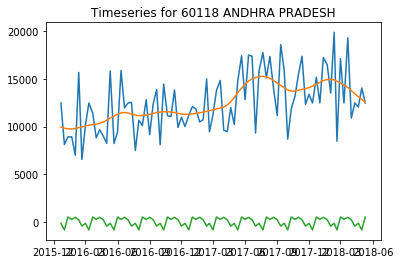

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1231.8071941041912   {'d': 3, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1269.8068294630566   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.38  minutes
               0
72  13902.304688
73  13028.880859
74  13202.101074
75  13154.876343
76  13322.040741
77  13176.974754
78  13213.998228
79  13216.972517
80  13232.496560
81  13210.110515
82  13218.394455
83  13219.493512
84  13220.123760
85  13217.030560
86  13218.760572 15
wma,  AIC:9223372036854775807 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:9223372036854775807
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of tim

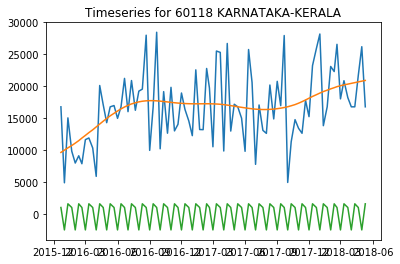

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1327.63889026486   {'d': 1, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1350.0922249904672   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.35  minutes
               0
72  17172.625000
73  18319.031250
74  18464.289062
75  19282.986328
76  18309.732910
77  18594.009888
78  18662.754547
79  18712.370918
80  18569.717066
81  18634.713105
82  18644.888909
83  18640.422499
84  18622.435395
85  18635.614977
86  18635.840445 15
wma,  AIC:228.68742790228205 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:222.62159121632754
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeser

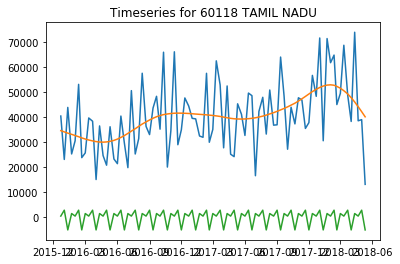

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1431.6469257208598   {'d': 3, 'method': 0, 'p': 2, 'q': 1}
egarch,  AIC:1475.5442075183141   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.43  minutes
               0
72  44189.250000
73  43530.437500
74  45541.421875
75  47474.527344
76  45183.909180
77  45432.573975
78  45908.108093
79  45999.779648
80  45631.092724
81  45742.888610
82  45820.467269
83  45798.557063
84  45748.251416
85  45777.541089
86  45786.204209 15
wma,  AIC:249.35248028037896 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:250.29221857508225
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

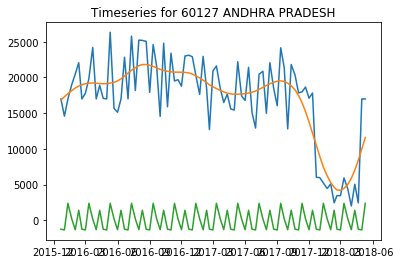

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1244.5756147747884   {'d': 2, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:1291.1399742952156   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.44  minutes
               0
72  17879.875000
73  17855.843750
74  17657.804688
75  17800.380859
76  17798.476074
77  17778.126343
78  17758.696991
79  17783.920067
80  17779.804869
81  17775.137067
82  17774.389748
83  17778.312938
84  17776.911156
85  17776.187727
86  17776.450392 15
wma,  AIC:162.46247739458883 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:160.80218299796053
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

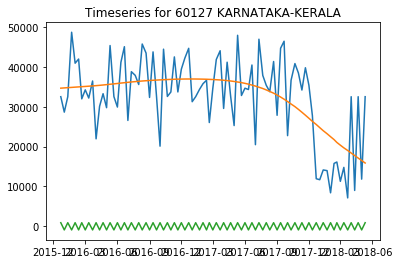

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1364.5923038639896   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1414.704901664926   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.41  minutes
               0
72  34271.875000
73  34295.843750
74  32929.054688
75  32313.943359
76  33452.679199
77  33247.880249
78  32985.889374
79  33000.098045
80  33171.636717
81  33101.376096
82  33064.750058
83  33084.465229
84  33105.557025
85  33089.037102
86  33085.952354 15
wma,  AIC:232.47079544004487 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:213.43259969094646
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

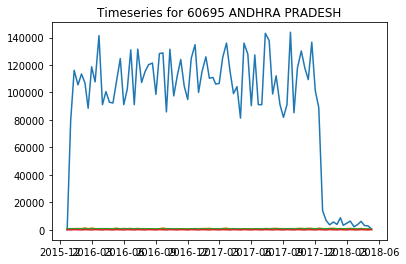

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:942.0918303706152   {'d': 2, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:955.5340622819097   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.43  minutes
             0
72  909.167500
73  862.894375
74  836.525469
75  953.396836
76  890.496045
77  885.828181
78  891.561633
79  905.320674
80  893.301633
81  894.003030
82  896.046742
83  897.168020
84  895.129856
85  895.586912
86  895.982883 15
wma,  AIC:142.23633143967078 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:143.40910241379703
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend

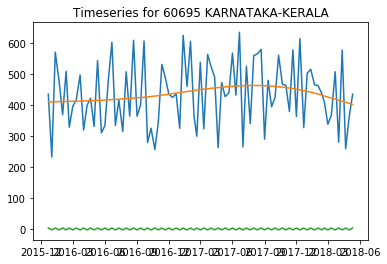

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:814.145117046413   {'d': 2, 'method': 0, 'p': 0, 'q': 2}
egarch,  AIC:840.8753487962827   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.49  minutes
             0
72  483.817500
73  509.916875
74  492.851094
75  525.268867
76  502.963584
77  507.750105
78  507.208412
79  510.797742
80  507.179961
81  508.234055
82  508.355043
83  508.641700
84  508.102690
85  508.333372
86  508.358201 15
wma,  AIC:112.24557431360402 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:115.12137878118429
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

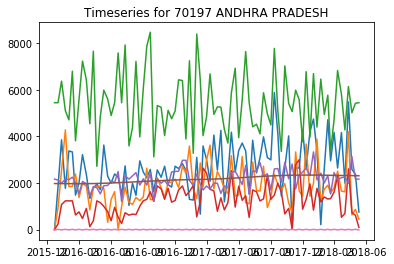

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:994.3633625934322   {'d': 2, 'method': 0, 'p': 1, 'q': 2}
egarch,  AIC:1017.861509300648   {'method': 0, 'p': 2, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.42  minutes
              0
72  2294.375000
73  2430.068750
74  2459.248438
75  2456.060547
76  2409.938184
77  2438.828979
78  2441.019037
79  2436.461687
80  2431.561972
81  2436.967919
82  2436.502653
83  2435.373558
84  2435.101525
85  2435.986414
86  2435.741038 15
wma,  AIC:141.7880272970453 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:144.16707499024918
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

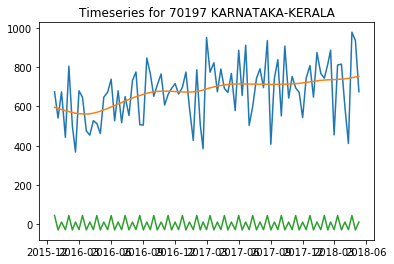

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:854.5693639137905   {'d': 1, 'method': 0, 'p': 1, 'q': 2}
egarch,  AIC:858.6254954045355   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.38  minutes
             0
72  663.625000
73  655.781250
74  651.726562
75  678.783203
76  662.479004
77  662.192505
78  663.795319
79  666.812508
80  663.819834
81  664.155041
82  664.645675
83  664.858264
84  664.369704
85  664.507171
86  664.595204 15
wma,  AIC:98.57601173361753 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:86.55897234855607
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend a

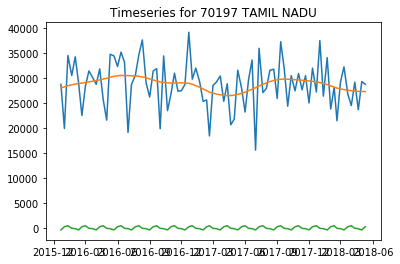

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1332.7010527356915   {'d': 0, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1353.6050853598208   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.43  minutes
               0
72  28760.925000
73  29045.118750
74  28692.473438
75  29617.791797
76  29029.077246
77  29096.115308
78  29108.864447
79  29212.962199
80  29111.754800
81  29132.424189
82  29141.501409
83  29149.660649
84  29133.835262
85  29139.355377
86  29141.088174 15
wma,  AIC:205.9778951397685 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:202.061099621432
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseri

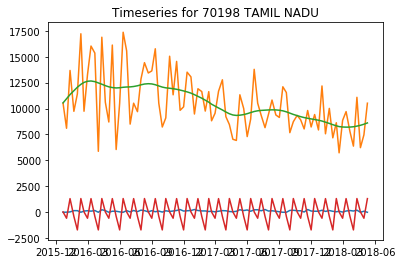

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1225.7534000399742   {'d': 3, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1249.7431923468912   {'method': 0, 'p': 2, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.46  minutes
              0
72  8875.365000
73  9084.968750
74  8902.903437
75  9072.091797
76  8983.832246
77  9010.949058
78  8992.444135
79  9014.829309
80  9000.513687
81  9004.684047
82  9003.117794
83  9005.786209
84  9003.525434
85  9004.278371
86  9004.176952 15
wma,  AIC:165.15175088831975 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:169.4041458282559
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

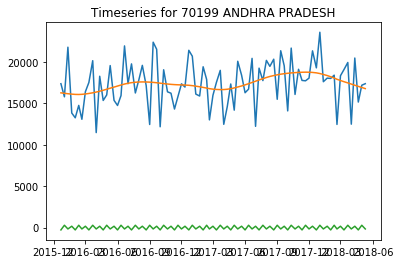

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1255.3737700108725   {'d': 0, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1282.043570182389   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.43  minutes
               0
72  18705.100000
73  18942.700000
74  19251.175000
75  19555.493750
76  19113.617187
77  19215.746484
78  19284.008105
79  19292.216382
80  19226.397040
81  19254.592003
82  19264.303382
83  19259.377202
84  19251.167407
85  19257.359998
86  19258.051997 15
wma,  AIC:203.25968663724058 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:208.01686768882644
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

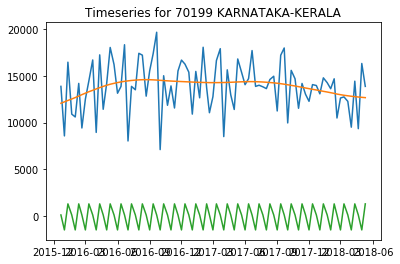

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1248.116974821465   {'d': 1, 'method': 0, 'p': 2, 'q': 0}
egarch,  AIC:1265.2801834079726   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.43  minutes
               0
72  13385.375000
73  13185.968750
74  13226.110937
75  13464.088672
76  13315.385840
77  13297.888550
78  13325.868500
79  13350.807890
80  13322.487695
81  13324.263159
82  13330.856811
83  13332.103889
84  13327.427888
85  13328.662937
86  13329.762881 15
wma,  AIC:170.30804640431606 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:116.82546304062652
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

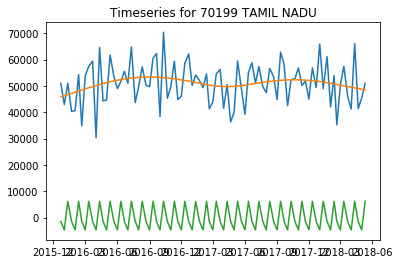

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1392.0091974897744   {'d': 1, 'method': 0, 'p': 0, 'q': 2}
egarch,  AIC:1388.7899308374274   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.44  minutes
               0
72  50936.675000
73  51132.568750
74  50961.860938
75  52461.026172
76  51373.032715
77  51482.122144
78  51569.510492
79  51721.422881
80  51536.522058
81  51577.394393
82  51601.212456
83  51609.137947
84  51581.066713
85  51592.202877
86  51595.904998 15
wma,  AIC:9223372036854775807 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:219.6591584821794
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

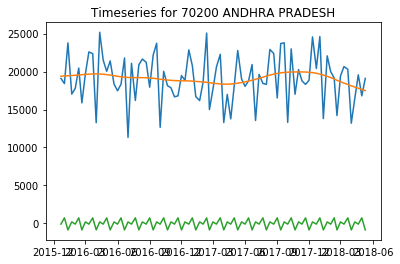

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1250.6083223619346   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1302.0606136307033   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.42  minutes
               0
72  20117.750000
73  20457.625000
74  20994.906250
75  21531.945312
76  20775.556641
77  20940.008301
78  21060.604126
79  21077.028595
80  20963.299416
81  21010.235109
82  21027.791811
83  21019.588733
84  21005.228767
85  21015.711105
86  21017.080104 15
wma,  AIC:218.76490326353792 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:217.63370042818144
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

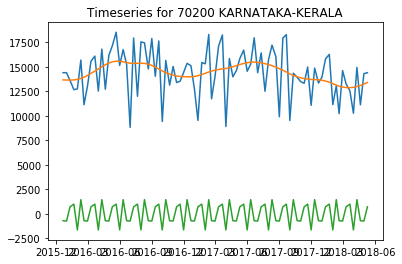

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1201.0830750955768   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1246.3131899387001   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.44  minutes
               0
72  13554.937500
73  13615.171875
74  13275.652344
75  13828.627930
76  13568.597412
77  13572.012390
78  13561.222519
79  13632.615063
80  13583.611846
81  13587.365454
82  13591.203721
83  13598.699021
84  13590.220010
85  13591.872052
86  13592.998701 15
wma,  AIC:186.73311948795066 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:144.29587635450093
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

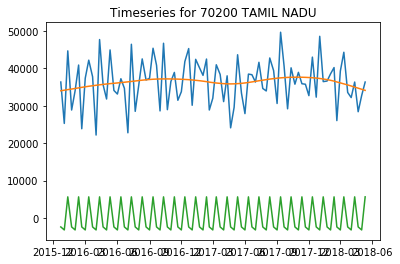

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1313.7852773145155   {'d': 2, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:1367.8473223295357   {'method': 0, 'p': 2, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.39  minutes
               0
72  36829.647500
73  37066.434375
74  37397.355469
75  38572.754336
76  37466.547920
77  37625.773025
78  37765.607687
79  37857.670742
80  37678.899844
81  37731.987824
82  37758.541524
83  37756.774984
84  37731.551044
85  37744.713844
86  37747.895349 15
wma,  AIC:225.13035229586276 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:223.61726131084984
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

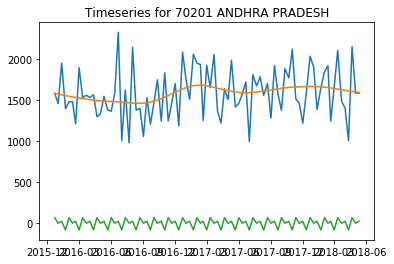

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:948.8554999945533   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:974.5418217885095   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.43  minutes
              0
72  1446.751524
73  1428.689405
74  1420.611757
75  1471.014696
76  1441.766846
77  1440.520676
78  1443.478494
79  1449.195178
80  1443.740298
81  1444.233661
82  1445.161908
83  1445.582761
84  1444.679657
85  1444.914497
86  1445.084706 15
wma,  AIC:117.28308292434063 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:9223372036854775807
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

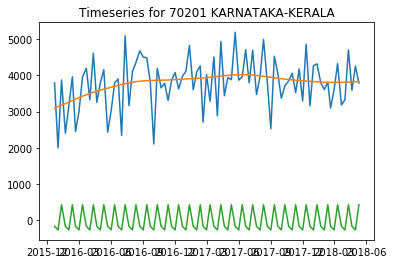

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1080.2453576262553   {'d': 2, 'method': 0, 'p': 2, 'q': 0}
egarch,  AIC:1079.6461813295289   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.4  minutes
              0
72  3961.250000
73  4071.812500
74  4045.640625
75  4234.050781
76  4078.188477
77  4107.423096
78  4116.325745
79  4133.997025
80  4108.983585
81  4116.682363
82  4118.997179
83  4119.665038
84  4116.082041
85  4117.856655
86  4118.150228 15
wma,  AIC:167.54815217216563 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:168.65131790055133
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

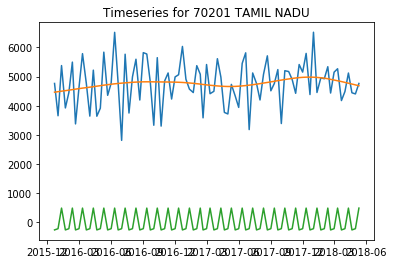

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1060.9281088952948   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1100.7094840512368   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.42  minutes
              0
72  5197.375000
73  5390.218750
74  5384.273438
75  5441.841797
76  5353.427246
77  5392.440308
78  5392.995697
79  5395.176262
80  5383.509878
81  5391.030536
82  5390.678093
83  5390.098692
84  5388.829300
85  5390.159155
86  5389.941310 15
wma,  AIC:161.9881749294529 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:167.6292052094938
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted se

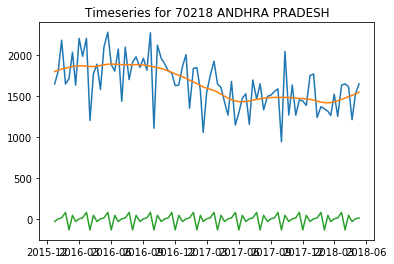

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:905.1983057371468   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:952.1646291367084   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.45  minutes
              0
72  1388.450000
73  1418.362500
74  1409.083125
75  1400.816406
76  1404.178008
77  1408.110010
78  1405.546887
79  1404.662828
80  1405.624433
81  1405.986039
82  1405.455047
83  1405.432087
84  1405.624402
85  1405.624394
86  1405.533982 15
wma,  AIC:100.14859291408258 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:126.58662950944182
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted se

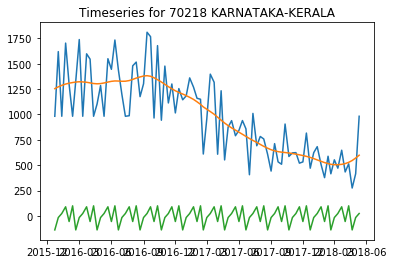

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:906.3435753025024   {'d': 1, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:933.6837171725836   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.44  minutes
             0
72  623.010000
73  622.847500
74  648.634375
75  677.760469
76  643.063086
77  648.076357
78  654.383572
79  655.820871
80  650.335972
81  652.154193
82  653.173652
83  652.871172
84  652.133747
85  652.583191
86  652.690440 15
wma,  AIC:123.55374052178342 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:112.7677943109199
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

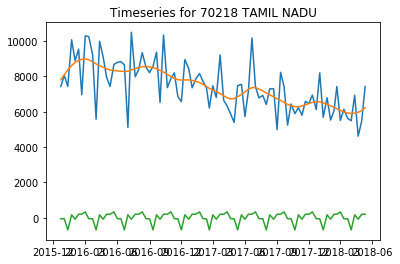

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1135.3411689702068   {'d': 0, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1152.6227176781565   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.46  minutes
              0
72  6453.402500
73  6616.028125
74  6622.525156
75  6660.108945
76  6588.016182
77  6621.669602
78  6623.079971
79  6623.218675
80  6613.996108
81  6620.491089
82  6620.196461
83  6619.475583
84  6618.539810
85  6619.675736
86  6619.471897 15
wma,  AIC:156.48190618168354 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:144.9650657556305
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

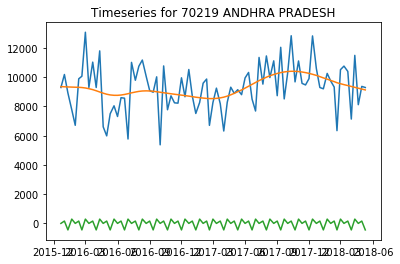

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1180.6775244310456   {'d': 3, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:1201.0301724304456   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.45  minutes
               0
72  10445.292500
73  10661.983125
74  10959.648906
75  11223.311133
76  10822.558916
77  10916.875520
78  10980.598619
79  10985.836047
80  10926.467275
81  10952.444365
82  10961.336577
83  10956.521066
84  10949.192321
85  10954.873582
86  10955.480886 15
wma,  AIC:200.76993419121004 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:204.53879697534046
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

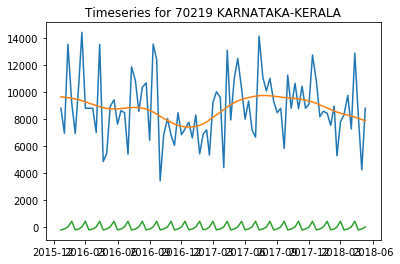

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1228.7248456477428   {'d': 2, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:1257.3819625085723   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.42  minutes
               0
72  10267.163038
73  10225.528797
74  10583.997959
75  10953.857449
76  10507.636811
77  10567.755254
78  10653.311868
79  10670.640345
80  10599.836069
81  10622.885884
82  10636.668542
83  10632.507710
84  10622.974551
85  10628.759172
86  10630.227494 15
wma,  AIC:200.30422633419977 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:207.89511948702489
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

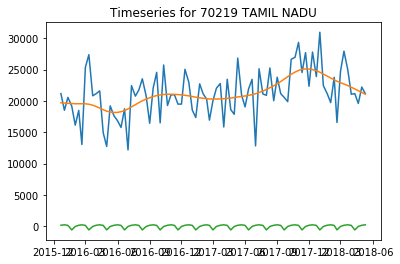

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1295.1780375152186   {'d': 1, 'method': 0, 'p': 1, 'q': 2}
egarch,  AIC:1307.092104651626   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.39  minutes
               0
72  25590.242500
73  25855.110625
74  25395.333281
75  26159.806602
76  25750.123252
77  25790.093440
78  25773.839144
79  25868.465609
80  25795.630361
81  25807.007139
82  25811.235563
83  25820.584668
84  25808.614433
85  25811.860451
86  25813.073779 15
wma,  AIC:198.33527373342324 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:223.47965301904875
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

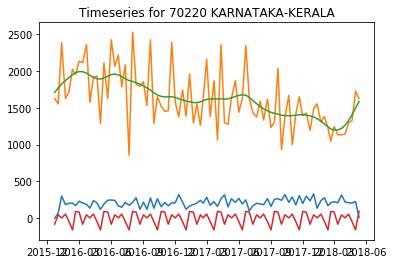

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:958.976954805097   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:994.0149973742213   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.43  minutes
              0
72  1470.510000
73  1485.357500
74  1444.071875
75  1456.972344
76  1464.227930
77  1462.657412
78  1456.982390
79  1460.210019
80  1461.019438
81  1460.217315
82  1459.607290
83  1460.263515
84  1460.276890
85  1460.091253
86  1460.059737 15
wma,  AIC:110.74407924891179 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:117.97766127387918
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

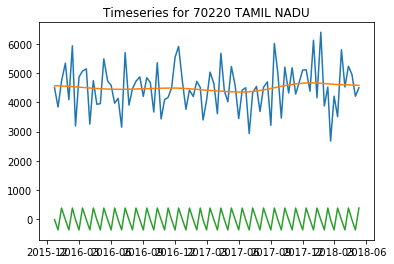

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1073.0955599178365   {'d': 3, 'method': 0, 'p': 3, 'q': 0}
egarch,  AIC:1093.1537561558766   {'method': 0, 'p': 0, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.4  minutes
              0
72  4797.987500
73  4926.276875
74  4987.616094
75  4957.895117
76  4917.443896
77  4947.307996
78  4952.565776
79  4943.803196
80  4940.280216
81  4945.989296
82  4945.659621
83  4943.933082
84  4943.965554
85  4944.886888
86  4944.611286 15
wma,  AIC:155.49520599151418 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:152.27698461269412
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

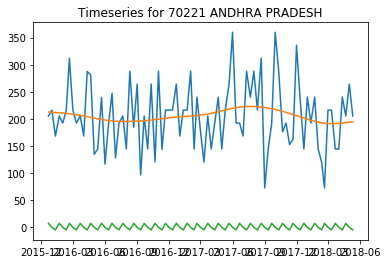

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:759.2422829540842   {'d': 2, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:768.1852950796381   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.42  minutes
             0
72  222.550000
73  240.137500
74  259.671875
75  240.589844
76  240.737305
77  245.284131
78  246.570789
79  243.295517
80  243.971935
81  244.780593
82  244.654708
83  244.175688
84  244.395731
85  244.501680
86  244.431952 15
wma,  AIC:106.17465878892128 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:66.08362736886127
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

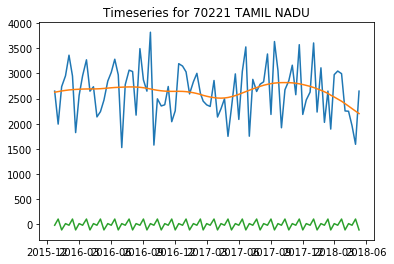

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1042.5891558928909   {'d': 1, 'method': 0, 'p': 2, 'q': 1}
egarch,  AIC:1057.2582266721865   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.46  minutes
              0
72  2700.087500
73  2731.146875
74  2521.796094
75  2606.182617
76  2639.803271
77  2624.732214
78  2598.128549
79  2617.211663
80  2619.968925
81  2615.010338
82  2612.579869
83  2616.192698
84  2615.937957
85  2614.930216
86  2614.910185 15
wma,  AIC:161.22148515156755 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:114.37822813510171
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

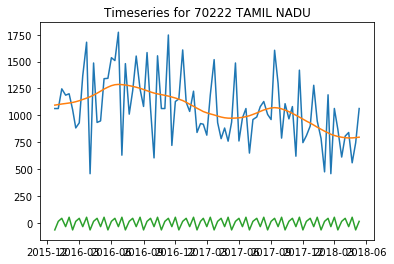

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:970.008133122506   {'d': 2, 'method': 0, 'p': 2, 'q': 1}
egarch,  AIC:980.722847413988   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.41  minutes
             0
72  898.352500
73  968.220625
74  855.325781
75  882.857227
76  901.189033
77  901.898167
78  885.317552
79  892.815495
80  895.305062
81  893.834069
82  891.818044
83  893.443167
84  893.600085
85  893.173841
86  893.008785 15
wma,  AIC:139.6924995019225 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:125.48043225250878
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend an

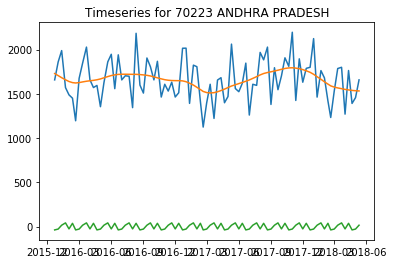

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:923.0217967792368   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:951.7545689308189   {'method': 0, 'p': 0, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.39  minutes
              0
72  1684.875000
73  1749.818750
74  1713.448438
75  1734.010547
76  1720.538184
77  1729.453979
78  1724.362787
79  1727.091374
80  1725.361581
81  1726.567430
82  1725.845793
83  1726.216545
84  1725.997837
85  1726.156901
86  1726.054269 15
wma,  AIC:124.23426342152665 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:105.58067667255443
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted se

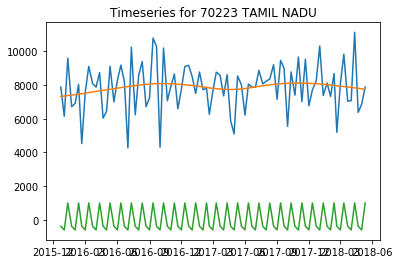

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1136.6514097895501   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1176.112986369185   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.45  minutes
              0
72  7755.925000
73  7941.831250
74  7544.889062
75  7739.161328
76  7745.451660
77  7742.833325
78  7693.083844
79  7730.132539
80  7727.875342
81  7723.481263
82  7718.643247
83  7725.033098
84  7723.758237
85  7722.728961
86  7722.540886 15
wma,  AIC:176.60125418034988 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:111.91004566392948
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

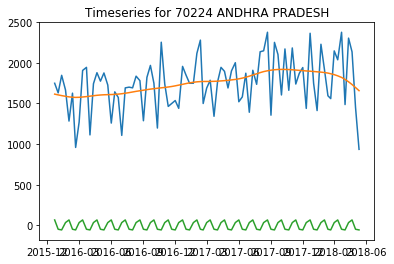

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:968.8924812183957   {'d': 1, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:974.659575528033   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.45  minutes
              0
72  1747.562500
73  1749.703125
74  1719.566406
75  1664.020508
76  1720.213135
77  1713.375793
78  1704.293961
79  1700.475849
80  1709.589684
81  1706.933822
82  1705.323329
83  1705.580671
84  1706.856877
85  1706.173675
86  1705.983638 15
wma,  AIC:136.15449568446152 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:131.50468012537175
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

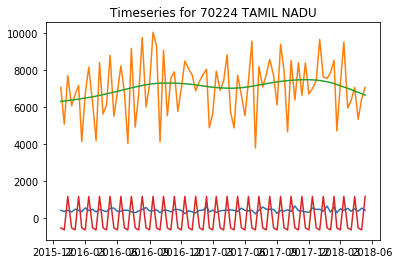

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1126.4827342253693   {'d': 1, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1172.1450401176694   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.48  minutes
              0
72  7174.687500
73  7310.109375
74  7043.699219
75  7129.311523
76  7164.451904
77  7161.893005
78  7124.838913
79  7145.123837
80  7149.076915
81  7145.233167
82  7141.068208
83  7145.125532
84  7145.125955
85  7144.138216
86  7143.864478 15
wma,  AIC:165.44273360878734 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:87.49150001053937
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

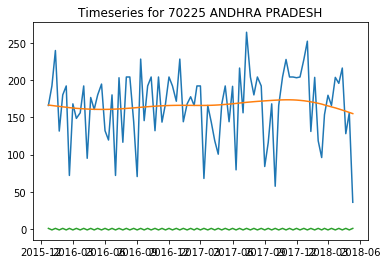

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:700.1285448255007   {'d': 1, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:726.4648098612662   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.47  minutes
             0
72  203.750000
73  203.687500
74  203.609375
75  203.761719
76  203.702148
77  203.690186
78  203.690857
79  203.711227
80  203.698605
81  203.697719
82  203.699602
83  203.701788
84  203.699428
85  203.699634
86  203.700113 15
wma,  AIC:-326187.7602207962 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:68.72561832759474
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

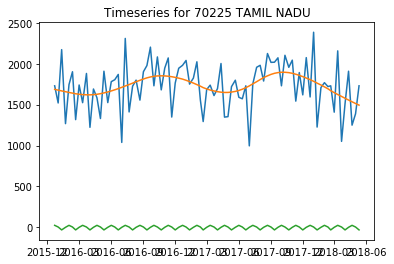

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:919.4709286257565   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:954.0968274531292   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.47  minutes
              0
72  1781.750000
73  1841.562500
74  1829.078125
75  1881.597656
76  1833.497070
77  1846.433838
78  1847.651672
79  1852.295059
80  1844.969410
81  1847.837495
82  1848.188409
83  1848.322593
84  1847.329477
85  1847.919494
86  1847.939993 15
wma,  AIC:136.9241323668116 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:134.72466725750257
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

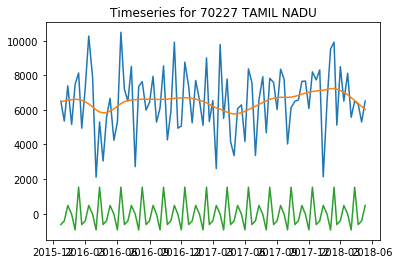

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1176.122730199446   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1203.3958305949732   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.46  minutes
              0
72  7396.625000
73  7333.781250
74  7250.601562
75  7544.626953
76  7381.408691
77  7377.604614
78  7388.560455
79  7423.050179
80  7392.655985
81  7395.467808
82  7399.933607
83  7402.776895
84  7397.708574
85  7398.971721
86  7399.847699 15
wma,  AIC:168.7157432791217 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:182.43219159604402
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted se

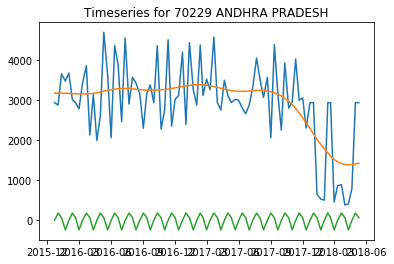

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1056.5442389256236   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1101.8735919727858   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.45  minutes
              0
72  3099.000000
73  2865.750000
74  2832.187500
75  2775.234375
76  2893.042969
77  2841.553711
78  2835.504639
79  2836.333923
80  2851.608810
81  2841.250271
82  2841.174411
83  2842.591854
84  2844.156336
85  2842.293218
86  2842.553955 15
wma,  AIC:170.26836327609925 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:153.17435212276368
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

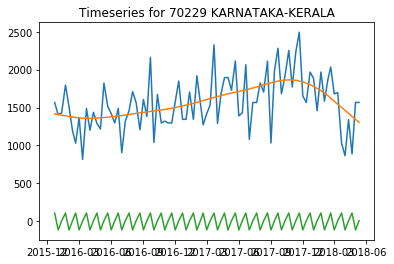

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:950.7640176369933   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:975.7862621054412   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.41  minutes
              0
72  1986.160938
73  1924.701172
74  1782.751465
75  1815.064331
76  1877.169476
77  1849.921611
78  1831.226721
79  1843.345535
80  1850.415836
81  1843.727426
82  1842.178879
83  1844.916919
84  1845.309765
85  1844.033247
86  1844.109703 15
wma,  AIC:161.45800430031596 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:9223372036854775807
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

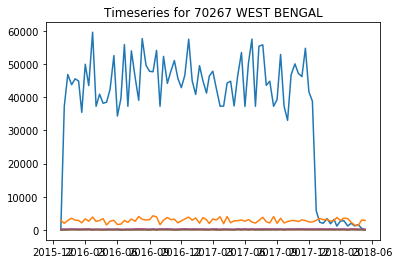

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:740.000171899615   {'d': 0, 'method': 0, 'p': 2, 'q': 2}
egarch,  AIC:751.7244169431348   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.48  minutes
             0
72  222.200000
73  215.575000
74  218.743750
75  222.579688
76  219.774609
77  219.168262
78  220.066577
79  220.397284
80  219.851683
81  219.870951
82  220.046624
83  220.041636
84  219.952723
85  219.977984
86  220.004742 15
wma,  AIC:59.57570569055953 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:70.04278731537937
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend an

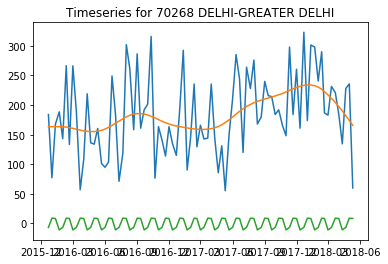

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:734.3907875040377   {'d': 1, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:766.4558808543053   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.36  minutes
             0
72  225.902591
73  207.878239
74  213.832708
75  202.153385
76  212.441731
77  209.076516
78  209.376085
79  208.261929
80  209.789065
81  209.125899
82  209.138244
83  209.078784
84  209.282998
85  209.156481
86  209.164127 15
wma,  AIC:94.04689142205102 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:53.61659790303401
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend a

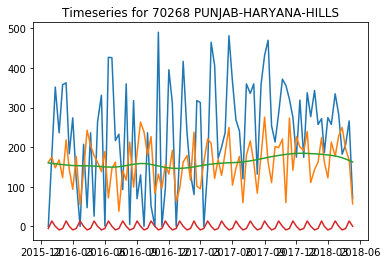

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:733.2847685207595   {'d': 1, 'method': 0, 'p': 0, 'q': 2}
egarch,  AIC:757.0665572075134   {'method': 0, 'p': 2, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.44  minutes
             0
72  210.687500
73  194.921875
74  208.214844
75  203.643555
76  204.366943
77  202.786804
78  204.753036
79  203.887585
80  203.948592
81  203.844004
82  204.108304
83  203.947121
84  203.962006
85  203.965359
86  203.995698 15
wma,  AIC:81.8228755265231 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:68.87376303643643
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend an

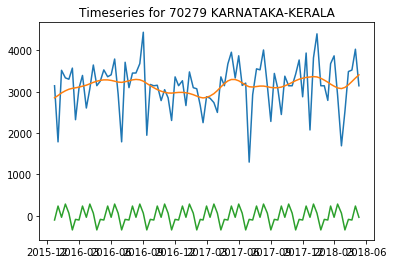

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1038.7302111181875   {'d': 0, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:1042.9714162554578   {'method': 0, 'p': 2, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.45  minutes
              0
72  3499.875000
73  3518.968750
74  3457.210938
75  3602.513672
76  3519.642090
77  3524.583862
78  3525.987640
79  3543.181816
80  3528.348852
81  3530.525543
82  3532.010963
83  3533.516793
84  3531.100538
85  3531.788459
86  3532.104188 15
wma,  AIC:147.61972408205878 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:159.69167287727328
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

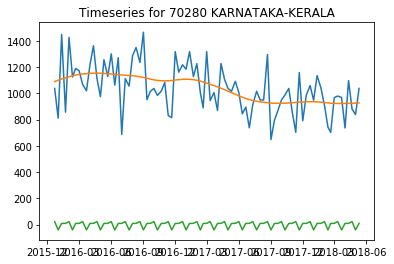

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:885.4099126350696   {'d': 1, 'method': 0, 'p': 2, 'q': 2}
egarch,  AIC:894.3268310642308   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.43  minutes
             0
72  908.852500
73  960.405625
74  911.119531
75  941.149414
76  930.381768
77  935.764084
78  929.603699
79  934.224741
80  932.493573
81  933.021525
82  932.335885
83  933.018931
84  932.717478
85  932.773455
86  932.711437 15
wma,  AIC:120.13296067739859 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:78.29264761087909
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

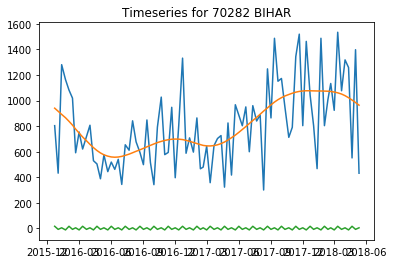

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:922.1790811744638   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:937.7057483496615   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.48  minutes
              0
72  1282.517683
73  1267.172104
74  1204.065130
75  1304.213729
76  1264.492161
77  1259.985781
78  1258.189200
79  1271.720218
80  1263.596840
81  1263.373010
82  1264.219817
83  1265.727471
84  1264.229284
85  1264.387396
86  1264.640992 15
wma,  AIC:136.6068983998399 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:154.2234349239199
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted seri

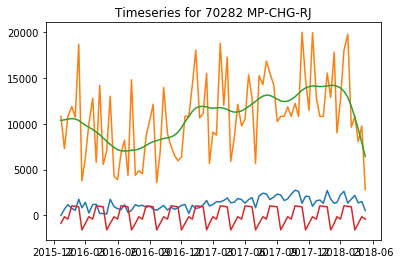

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1297.146510867448   {'d': 1, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:1316.2285587271313   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.47  minutes
               0
72  16536.150000
73  15678.312500
74  15893.590625
75  17008.063281
76  16279.029102
77  16214.748877
78  16348.857971
79  16462.674808
80  16326.327689
81  16338.152336
82  16369.003201
83  16374.039509
84  16351.880684
85  16358.268932
86  16363.298082 15
wma,  AIC:216.36794233576023 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:233.05031409000998
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

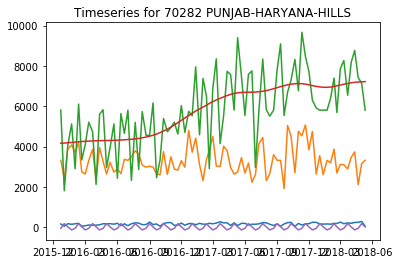

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1153.0259414665215   {'d': 1, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:1194.0662932594485   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.48  minutes
              0
72  8043.750000
73  7636.712500
74  7426.390625
75  7350.738281
76  7614.397852
77  7507.059814
78  7474.646643
79  7486.710648
80  7520.703739
81  7497.280211
82  7494.835310
83  7499.882477
84  7503.175434
85  7498.793358
86  7499.171645 15
wma,  AIC:194.09779066051505 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:145.21044801783535
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

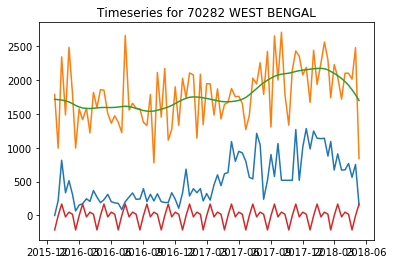

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:969.870245139455   {'d': 2, 'method': 0, 'p': 3, 'q': 0}
egarch,  AIC:995.9512250263907   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.42  minutes
              0
72  2260.325000
73  2217.956250
74  2184.945312
75  2212.456641
76  2218.920801
77  2208.569751
78  2206.223126
79  2211.542580
80  2211.314064
81  2209.412380
82  2209.623038
83  2210.473016
84  2210.205624
85  2209.928514
86  2210.057548 15
wma,  AIC:127.89470445840693 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:139.16135587964973
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

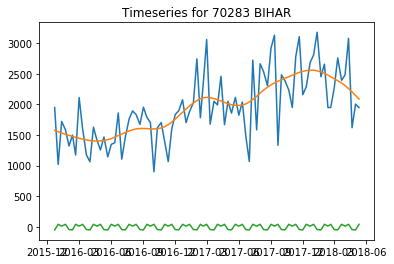

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:998.1174071784465   {'d': 1, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:1014.8558874368874   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.47  minutes
              0
72  2584.062500
73  2534.203125
74  2391.191406
75  2449.301758
76  2489.689697
77  2466.096497
78  2449.069839
79  2463.539448
80  2467.098870
81  2461.451164
82  2460.289830
83  2463.094828
84  2462.983673
85  2461.954874
86  2462.080801 15
wma,  AIC:158.59866101631164 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:134.20824320974987
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

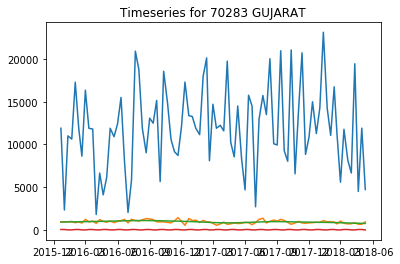

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:893.2008340958561   {'d': 3, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:908.8412001792547   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.46  minutes
             0
72  794.125000
73  794.843750
74  804.867188
75  805.271484
76  799.776855
77  801.189819
78  802.776337
79  802.253624
80  801.499159
81  801.929735
82  802.114714
83  801.949308
84  801.873229
85  801.966746
86  801.975999 15
wma,  AIC:77.12211074246642 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:95.73660602953973
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend a

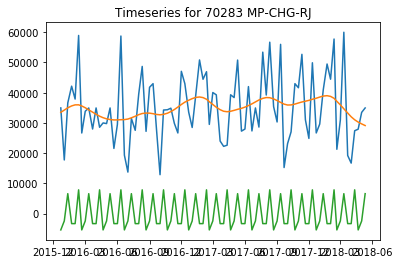

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1410.9402001755261   {'d': 3, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:1449.266161124305   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.6  minutes
               0
72  39619.875000
73  36354.843750
74  37684.242188
75  40887.115234
76  38636.519043
77  38390.680054
78  38899.639130
79  39203.488365
80  38782.581648
81  38819.097299
82  38926.201610
83  38932.842231
84  38865.180697
85  38885.830459
86  38902.513749 15
wma,  AIC:252.27145014860392 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:247.8326284827936
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseri

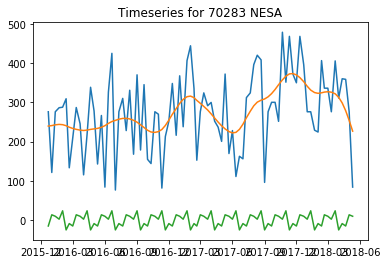

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:803.8216800046117   {'d': 1, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:810.7754775638971   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.83  minutes
             0
72  414.437500
73  401.046875
74  408.308594
75  422.948242
76  411.685303
77  410.997253
78  413.484848
79  414.778912
80  412.736579
81  412.999398
82  413.499934
83  413.503706
84  413.184904
85  413.296985
86  413.371382 15
wma,  AIC:91.1666349678237 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:117.21266463451904
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend a

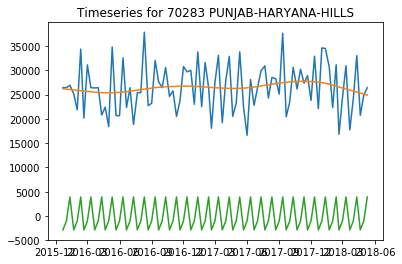

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1301.1755654449664   {'d': 2, 'method': 0, 'p': 3, 'q': 0}
egarch,  AIC:1338.484096121724   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.81  minutes
               0
72  28249.562500
73  28470.203125
74  28358.503906
75  29497.254883
76  28643.881104
77  28742.460754
78  28810.525162
79  28923.530476
80  28780.099374
81  28814.153941
82  28832.077238
83  28837.465257
84  28815.948953
85  28824.911347
86  28827.600699 15
wma,  AIC:215.78465152097993 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:222.78958937754868
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

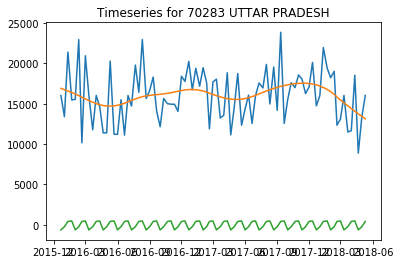

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1240.0210546403243   {'d': 1, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1292.838572388937   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.83  minutes
               0
72  17867.427500
73  17824.159375
74  18215.886719
75  18505.493398
76  18103.241748
77  18162.195310
78  18246.704294
79  18254.408688
80  18191.637510
81  18213.736450
82  18226.621735
83  18221.601096
84  18213.399198
85  18218.839620
86  18220.115412 15
wma,  AIC:198.73606531665243 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:208.9957212362445
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeser

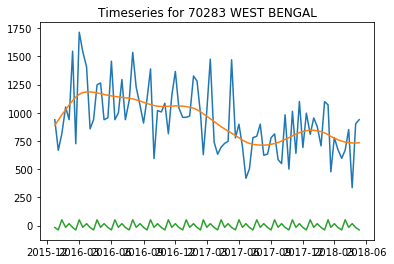

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:965.1471911679232   {'d': 0, 'method': 0, 'p': 3, 'q': 0}
egarch,  AIC:954.1378121996827   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.84  minutes
             0
72  857.507500
73  911.696875
74  864.558594
75  907.690742
76  885.363428
77  892.327410
78  887.485043
79  893.216656
80  889.598134
81  890.656811
82  890.239161
83  890.927690
84  890.355449
85  890.544778
86  890.516770 15
wma,  AIC:124.3831729107114 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:81.29910098446476
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend a

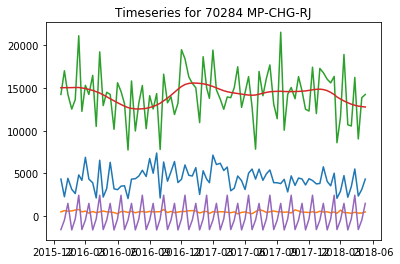

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1248.3459763459962   {'d': 2, 'method': 0, 'p': 2, 'q': 0}
egarch,  AIC:1262.0083161406696   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.8  minutes
               0
72  14228.750000
73  14122.562500
74  14524.453125
75  15078.441406
76  14488.551758
77  14553.502197
78  14661.237122
79  14695.433121
80  14599.681049
81  14627.463372
82  14645.953666
83  14642.132802
84  14628.807722
85  14636.089391
86  14638.245895 15
wma,  AIC:207.3107479924083 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:201.48350321086525
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeser

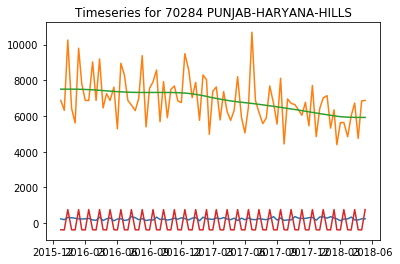

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1140.454595440777   {'d': 3, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1160.284080282986   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  1.11  minutes
              0
72  6491.375000
73  6603.968750
74  6564.085938
75  6842.357422
76  6625.446777
77  6658.964722
78  6672.713715
79  6699.870659
80  6664.248968
81  6673.949516
82  6677.695714
83  6678.941214
84  6673.708853
85  6676.073824
86  6676.604902 15
wma,  AIC:176.00969102516584 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:161.43978597056616
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted se

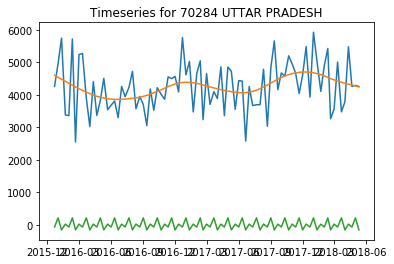

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1057.7820280744934   {'d': 2, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1059.1440440494252   {'method': 0, 'p': 0, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.78  minutes
              0
72  4700.500000
73  4710.250000
74  4877.187500
75  4943.109375
76  4807.761719
77  4834.577148
78  4865.658936
79  4862.776794
80  4842.693649
81  4851.426632
82  4855.639003
83  4853.134020
84  4850.723326
85  4852.730745
86  4853.056773 15
wma,  AIC:169.6751800598158 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:172.81837111097633
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

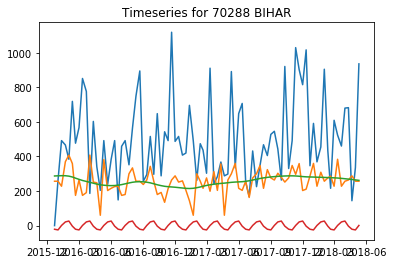

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:768.8222055583569   {'d': 0, 'method': 0, 'p': 1, 'q': 2}
egarch,  AIC:775.204670863238   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.94  minutes
             0
72  267.500000
73  260.125000
74  235.406250
75  243.507812
76  251.634766
77  247.668457
78  244.554321
79  246.841339
80  247.674721
81  246.684710
82  246.438773
83  246.909886
84  246.927022
85  246.740097
86  246.753944 15
wma,  AIC:105.5716518671129 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:74.24686630345703
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend an

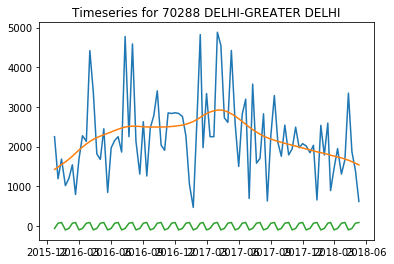

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1125.4000372203911   {'d': 2, 'method': 0, 'p': 0, 'q': 2}
egarch,  AIC:1140.0343686046692   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.92  minutes
              0
72  2139.750000
73  2051.687500
74  2071.359375
75  2070.199219
76  2083.249023
77  2069.123779
78  2073.482849
79  2074.013718
80  2074.967342
81  2072.896922
82  2073.840208
83  2073.929547
84  2073.908505
85  2073.643796
86  2073.830514 15
wma,  AIC:133.58050459219356 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:122.97302896668208
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

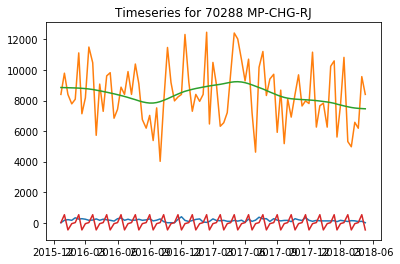

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1191.9814414649534   {'d': 2, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1233.6189995606296   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.85  minutes
              0
72  8645.000000
73  8896.000000
74  9126.000000
75  9457.500000
76  9031.125000
77  9127.656250
78  9185.570312
79  9200.462891
80  9136.203613
81  9162.473267
82  9171.177521
83  9167.579323
84  9159.358431
85  9165.147135
86  9165.815602 15
wma,  AIC:201.20713232794216 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:197.20784276287185
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

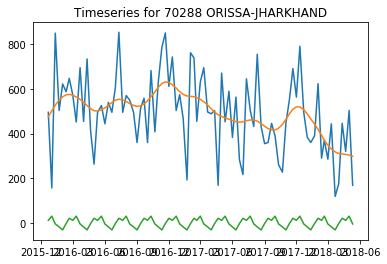

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:868.1878049515677   {'d': 1, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:884.3428001240643   {'method': 0, 'p': 2, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.91  minutes
             0
72  650.000000
73  674.500000
74  670.125000
75  696.656250
76  672.820312
77  678.525391
78  679.531738
79  681.883423
80  678.190216
81  679.532692
82  679.784517
83  679.847712
84  679.338784
85  679.625926
86  679.649235 15
wma,  AIC:114.03447602004576 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:130.2276552348789
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

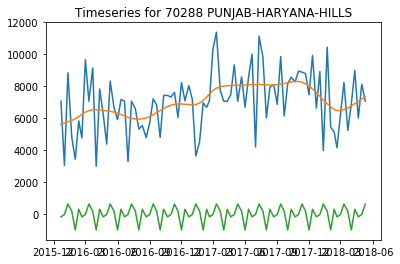

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1173.2784713238736   {'d': 2, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1197.0412684110215   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.87  minutes
              0
72  8760.500000
73  8731.875000
74  8718.593750
75  9031.742188
76  8810.677734
77  8823.222168
78  8846.058960
79  8877.925262
80  8839.471031
81  8846.669355
82  8852.531152
83  8854.149200
84  8848.205185
85  8850.388723
86  8851.318565 15
wma,  AIC:174.74419329812176 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:198.1957343658562
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

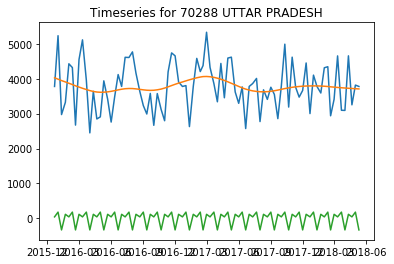

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1051.9584981241194   {'d': 1, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:1084.868406997316   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.86  minutes
              0
72  3835.500000
73  3855.625000
74  3951.281250
75  4023.351562
76  3916.439453
77  3936.674316
78  3956.936646
79  3958.350494
80  3942.100227
81  3948.515421
82  3951.475697
83  3950.110460
84  3948.050451
85  3949.538007
86  3949.793654 15
wma,  AIC:159.90120897382573 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:154.81228746917046
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

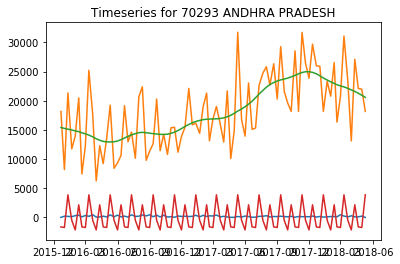

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1291.9047859166014   {'d': 1, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1335.681792117241   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.94  minutes
               0
72  27911.925000
73  26962.256250
74  27100.770313
75  27915.612891
76  27472.641113
77  27362.820142
78  27462.961115
79  27553.508815
80  27462.982796
81  27460.568217
82  27485.005236
83  27490.516266
84  27474.768129
85  27477.714462
86  27482.001023 15
wma,  AIC:210.97261602254216 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:240.02725108933637
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

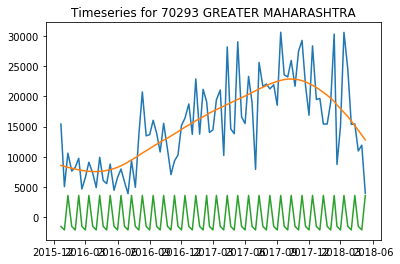

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1298.4876739610809   {'d': 1, 'method': 0, 'p': 0, 'q': 2}
egarch,  AIC:1319.5724296528113   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.74  minutes
               0
72  24055.300000
73  22758.225000
74  23006.256250
75  24539.620313
76  23589.850391
77  23473.487988
78  23652.303735
79  23813.815607
80  23632.364430
81  23642.992940
82  23685.369178
83  23693.635539
84  23663.590522
85  23671.397045
86  23678.498071 15
wma,  AIC:226.20642143957815 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:243.47575338601715
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

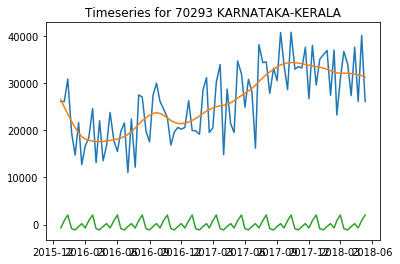

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1333.4415509757785   {'d': 3, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1357.605093892438   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.82  minutes
               0
72  33887.075000
73  34055.318750
74  33165.473437
75  34782.741797
76  33972.652246
77  33994.046558
78  33978.728510
79  34182.042278
80  34031.867398
81  34046.671186
82  34059.827343
83  34080.102051
84  34054.616994
85  34060.304393
86  34063.712695 15
wma,  AIC:218.92064244903068 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:241.04808299270678
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

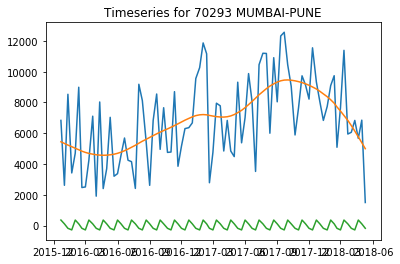

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1235.1949597982245   {'d': 2, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1260.965895746518   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.92  minutes
               0
72   9656.850000
73   9638.337500
74   9765.496875
75  10152.621094
76   9803.326367
77   9839.945459
78   9890.347449
79   9921.560092
80   9863.794842
81   9878.911960
82   9888.653586
83   9888.230120
84   9879.897627
85   9883.923323
86   9885.176164 15
wma,  AIC:189.72950387497517 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:213.2459313829232
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeser

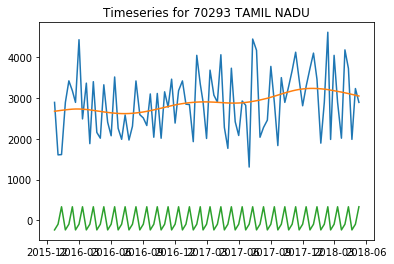

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1074.489801925042   {'d': 0, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:1090.9810472946679   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.9  minutes
              0
72  3421.150000
73  3244.312500
74  3192.365625
75  3287.182031
76  3286.252539
77  3252.528174
78  3254.582092
79  3270.136209
80  3265.874754
81  3260.780307
82  3262.843341
83  3264.908653
84  3263.601763
85  3263.033516
86  3263.596818 15
wma,  AIC:161.6227740130018 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:138.82576791773877
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

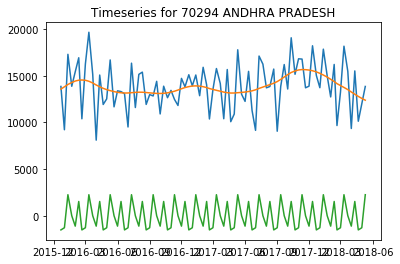

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1214.7133148188898   {'d': 1, 'method': 0, 'p': 2, 'q': 2}
egarch,  AIC:1232.4459005551357   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.87  minutes
               0
72  15641.000000
73  15356.812500
74  15769.328125
75  16241.847656
76  15752.247070
77  15780.058838
78  15885.870422
79  15915.005997
80  15833.295582
81  15853.557710
82  15871.932428
83  15868.447929
84  15856.808412
85  15862.686620
86  15864.968847 15
wma,  AIC:202.46710972845025 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:210.81871789479203
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

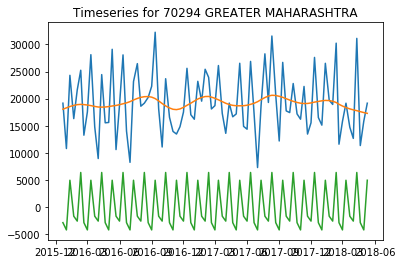

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1299.3533046740342   {'d': 1, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:1335.6152374308056   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.82  minutes
               0
72  19717.250000
73  19085.000000
74  20489.187500
75  21722.984375
76  20253.605469
77  20387.694336
78  20713.367920
79  20769.413025
80  20531.020187
81  20600.373867
82  20653.543750
83  20638.587707
84  20605.881378
85  20624.596676
86  20630.652378 15
wma,  AIC:236.40206112933484 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:230.69970419914029
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

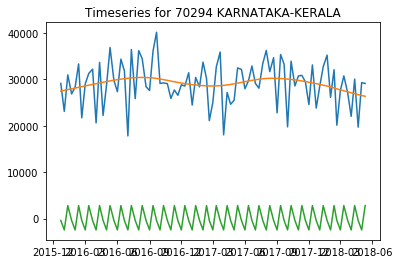

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1328.0737927887028   {'d': 1, 'method': 0, 'p': 1, 'q': 2}
egarch,  AIC:1344.3002414666655   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.87  minutes
               0
72  29462.467500
73  29122.896875
74  29049.246094
75  30176.307617
76  29452.729521
77  29450.295027
78  29532.144565
79  29652.869183
80  29522.009574
81  29539.329587
82  29561.588227
83  29568.949143
84  29547.969133
85  29554.459022
86  29558.241381 15
wma,  AIC:211.64056240495097 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:208.22797424015744
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

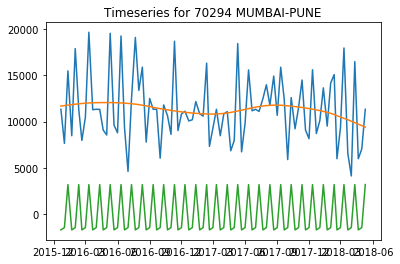

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1269.7685536045244   {'d': 2, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1287.5816641018484   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.81  minutes
               0
72  11824.125000
73  11159.406250
74  11680.945312
75  12564.556641
76  11807.258301
77  11803.041626
78  11963.950470
79  12034.701759
80  11902.238039
81  11925.982974
82  11956.718310
83  11954.910271
84  11934.962398
85  11943.143488
86  11947.433617 15
wma,  AIC:215.55118525730916 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:210.26833255924845
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

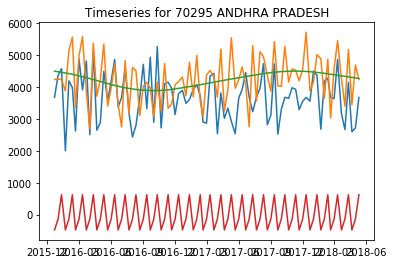

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1019.2846750033317   {'d': 1, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1067.6717374151049   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.93  minutes
              0
72  4750.625000
73  4806.156250
74  4956.695312
75  5059.119141
76  4893.148926
77  4928.779907
78  4959.435822
79  4960.120949
80  4935.371401
81  4945.927020
82  4950.213798
83  4947.908292
84  4944.855127
85  4947.226059
86  4947.550819 15
wma,  AIC:174.25868102838328 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:178.57912245945988
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

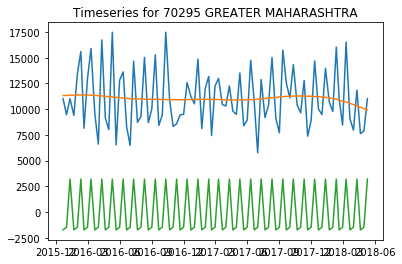

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1194.5982874472995   {'d': 3, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1226.6430282938713   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.81  minutes
               0
72  10935.375000
73  10471.343750
74  11246.179688
75  11833.099609
76  11121.499512
77  11168.030640
78  11342.202362
79  11366.208031
80  11249.485136
81  11281.481542
82  11309.844268
83  11301.754744
84  11285.641423
85  11294.680494
86  11297.980232 15
wma,  AIC:215.6010270669612 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:205.6473391736956
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeser

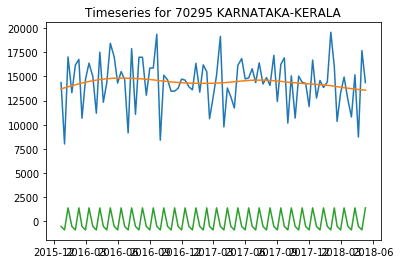

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1218.6455496586925   {'d': 2, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:1251.759867636073   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.96  minutes
               0
72  14301.140000
73  14280.925000
74  14284.281250
75  14886.226562
76  14438.143203
77  14472.394004
78  14520.261255
79  14579.256256
80  14502.513680
81  14518.606299
82  14530.159372
83  14532.633902
84  14520.978313
85  14525.594471
86  14527.341515 15
wma,  AIC:195.91890889266233 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:192.05235627073205
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

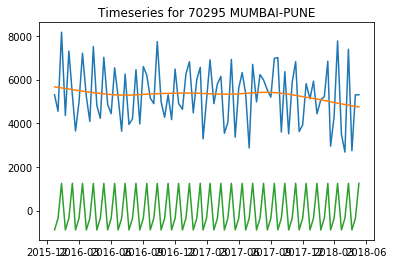

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1110.8154974997458   {'d': 1, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1137.3114643320594   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.88  minutes
              0
72  5043.250000
73  4598.312500
74  4842.390625
75  5073.738281
76  4889.422852
77  4850.966064
78  4914.129456
79  4932.064163
80  4896.645634
81  4898.451329
82  4910.322645
83  4909.370943
84  4903.697638
85  4905.460639
86  4907.212966 15
wma,  AIC:185.6276584005317 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:146.4209668936128
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted se

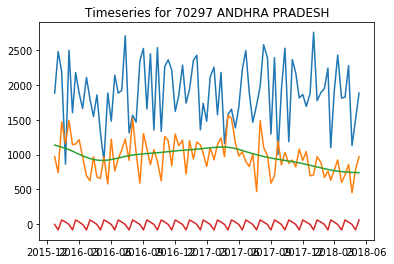

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:909.092987373385   {'d': 2, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:947.7458434564893   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.96  minutes
              0
72   965.250000
73  1001.062500
74   981.578125
75   997.722656
76   986.403320
77   991.691650
78   989.348938
79   991.291641
80   989.683887
81   990.504029
82   990.207124
83   990.421670
84   990.204178
85   990.334250
86   990.291806 15
wma,  AIC:108.49440038446372 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:88.245941046777
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series

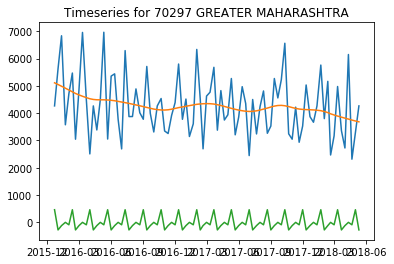

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1117.5355679700249   {'d': 1, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:1147.6753042188882   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.89  minutes
              0
72  3929.025000
73  3856.281250
74  4086.351562
75  4225.664453
76  4024.330566
77  4048.156958
78  4096.125885
79  4098.569466
80  4066.795719
81  4077.412007
82  4084.725769
83  4081.875740
84  4077.702309
85  4080.428956
86  4081.183194 15
wma,  AIC:178.64992367426925 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:158.68698140131812
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

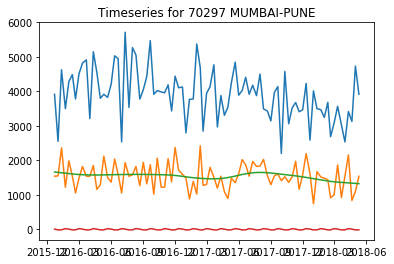

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:977.2271635534463   {'d': 1, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:-1560.2364846337161   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.72  minutes
              0
72  1727.250000
73  1665.312500
74  1790.890625
75  1845.113281
76  1757.141602
77  1764.614502
78  1789.440002
79  1789.077347
80  1775.068363
81  1779.550054
82  1783.283942
83  1781.744926
84  1779.911821
85  1781.122686
86  1781.515844 15
wma,  AIC:155.85199115517275 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:154.09560626462422
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

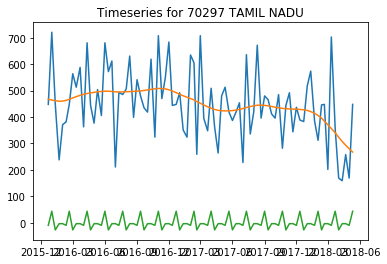

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:815.7217732766115   {'d': 1, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:846.3454132267883   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.86  minutes
             0
72  415.500000
73  396.375000
74  409.468750
75  402.585938
76  405.982422
77  403.603027
78  405.410034
79  404.395355
80  404.847710
81  404.564032
82  404.804283
83  404.652845
84  404.717217
85  404.684594
86  404.714735 15
wma,  AIC:87.37861187295367 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:81.79643418018797
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend a

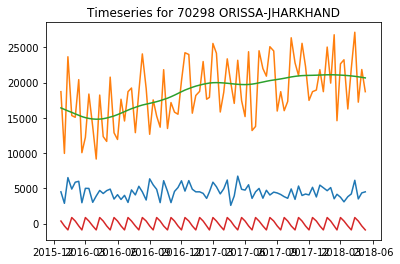

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1253.141151588546   {'d': 2, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1187.032483521326   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.93  minutes
               0
72  21004.828344
73  19866.410430
74  19261.325537
75  19709.161921
76  19960.431558
77  19699.332362
78  19657.562845
79  19756.622171
80  19768.487234
81  19720.501153
82  19725.793351
83  19742.850977
84  19739.408179
85  19732.138415
86  19735.047730 15
wma,  AIC:222.71040053155596 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:9223372036854775807
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

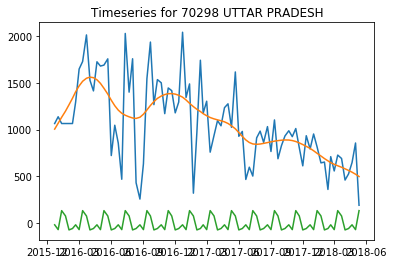

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:975.2937185619252   {'d': 2, 'method': 0, 'p': 0, 'q': 3}
egarch,  AIC:980.1371351374283   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.82  minutes
             0
72  841.500000
73  799.000000
74  797.062500
75  843.078125
76  820.160156
77  814.825195
78  818.781494
79  824.211243
80  819.494522
81  819.328114
82  820.453843
83  820.871930
84  820.037102
85  820.172747
86  820.383906 15
wma,  AIC:121.0306468788975 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:105.5637442808875
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend a

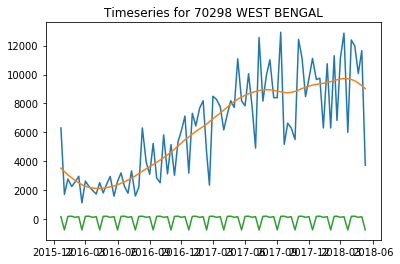

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1227.7726905642671   {'d': 1, 'method': 0, 'p': 0, 'q': 2}
egarch,  AIC:1199.617447490428   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.93  minutes
               0
72  10115.000000
73   9859.000000
74  10204.437500
75  10322.109375
76  10125.136719
77  10127.670898
78  10194.838623
79  10192.438904
80  10160.021286
81  10168.742428
82  10179.010310
83  10175.053232
84  10170.706814
85  10173.378196
86  10174.537138 15
wma,  AIC:183.14986614459917 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:213.77768202179476
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

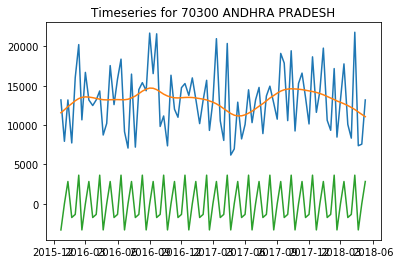

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1327.5368850404113   {'d': 3, 'method': 0, 'p': 1, 'q': 0}
egarch,  AIC:1287.4779633052397   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.79  minutes
               0
72  14724.730000
73  14256.602500
74  14445.513125
75  15523.041406
76  14737.471758
77  14740.657197
78  14861.670872
79  14965.710308
80  14826.377534
81  14848.603978
82  14875.590673
83  14879.070623
84  14857.410702
85  14865.168994
86  14869.310248 15
wma,  AIC:214.22780344241392 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:217.7337549272041
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

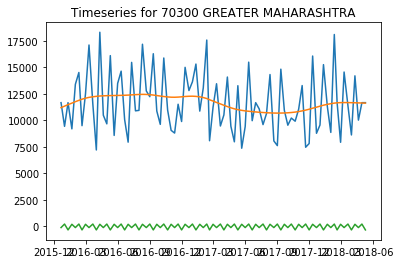

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1219.655477294704   {'d': 3, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:1285.816841399098   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.91  minutes
               0
72  11160.777500
73  10629.814375
74  11420.070469
75  12319.900586
76  11382.640732
77  11438.106541
78  11640.179582
79  11695.206860
80  11539.033429
81  11578.131603
82  11613.137868
83  11606.377440
84  11584.170085
85  11595.454249
86  11599.784911 15
wma,  AIC:221.94469339801594 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:211.12931704347457
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeser

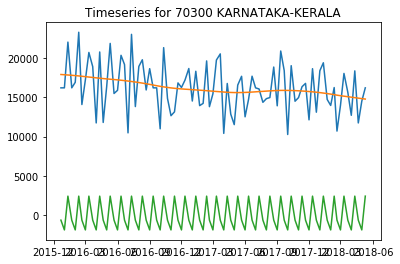

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1237.512657143524   {'d': 3, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1271.0387325003217   {'method': 0, 'p': 1, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.72  minutes
               0
72  15959.695000
73  15866.266250
74  15644.212812
75  16523.003516
76  15998.294395
77  16007.944243
78  16043.363741
79  16143.151474
80  16048.188463
81  16060.661980
82  16073.841415
83  16081.460833
84  16066.038173
85  16070.500600
86  16072.960255 15
wma,  AIC:201.98351582624363 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:193.35446192829608
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

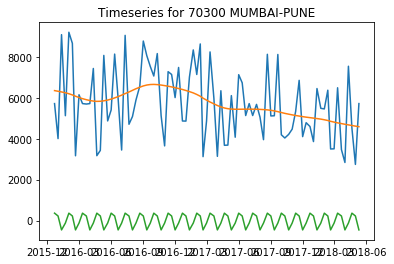

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1159.2369387961255   {'d': 1, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1206.3634290442583   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.81  minutes
              0
72  5266.497500
73  5249.394375
74  4849.120469
75  5036.430586
76  5100.360732
77  5058.826541
78  5011.184582
79  5051.700610
80  5055.518116
81  5044.307462
82  5040.677693
83  5048.050970
84  5047.138560
85  5045.043671
86  5045.227724 15
wma,  AIC:183.34555167198914 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:164.6397421048972
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

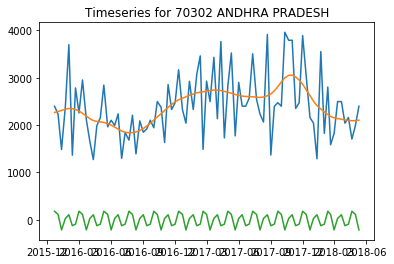

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1047.383769324648   {'d': 1, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:1064.1221338445728   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.42  minutes
              0
72  2939.875000
73  3086.968750
74  3240.710938
75  3078.888672
76  3086.610840
77  3123.294800
78  3132.376312
79  3105.292656
80  3111.893652
81  3118.214355
82  3116.944244
83  3113.086227
84  3115.034619
85  3115.819861
86  3115.221238 15
wma,  AIC:168.8867692515423 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:153.80138412386123
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted se

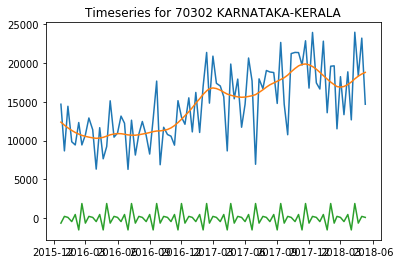

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1270.8480203522104   {'d': 2, 'method': 0, 'p': 3, 'q': 0}
egarch,  AIC:1299.344679294307   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.48  minutes
               0
72  20822.500000
73  21096.125000
74  20654.281250
75  21627.976562
76  21050.220703
77  21107.150879
78  21109.907349
79  21223.813873
80  21122.773201
81  21140.911325
82  21149.351437
83  21159.212459
84  21143.062106
85  21148.134332
86  21149.940083 15
wma,  AIC:206.10792796205536 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:233.4757750254448
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeser

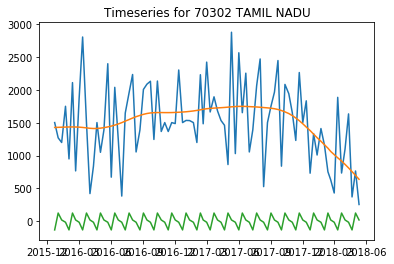

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1024.5121927078821   {'d': 1, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1062.2807815623307   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.44  minutes
              0
72  1708.875000
73  1828.218750
74  1718.898438
75  1772.623047
76  1757.153809
77  1769.223511
78  1754.474701
79  1763.368767
80  1761.055197
81  1762.030544
82  1760.232302
83  1761.671702
84  1761.247436
85  1761.295496
86  1761.111734 15
wma,  AIC:143.86089359809176 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:133.55618253131144
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

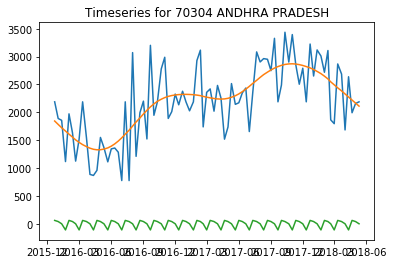

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1033.5468433851183   {'d': 2, 'method': 0, 'p': 2, 'q': 1}
egarch,  AIC:1044.957395109309   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.62  minutes
              0
72  2585.078449
73  2517.723062
74  2520.953827
75  2453.217284
76  2519.243156
77  2502.784332
78  2499.049650
79  2493.573605
80  2503.662686
81  2499.767568
82  2499.013377
83  2499.004309
84  2500.361985
85  2499.536810
86  2499.479120 15
wma,  AIC:144.97298937757563 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:9223372036854775807
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

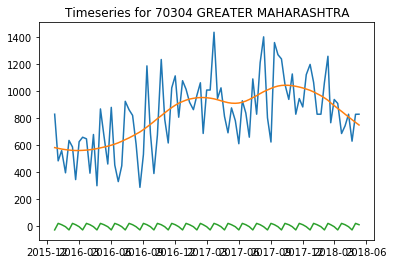

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:917.0310080870686   {'d': 1, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:933.2251403786221   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.86  minutes
              0
72   946.076687
73   975.019172
74   982.198965
75  1006.723706
76   977.504633
77   985.361619
78   987.947231
79   989.384297
80   985.049445
81   986.935648
82   987.329155
83   987.174636
84   986.622221
85   987.015415
86   987.035357 15
wma,  AIC:122.27192018712962 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:129.9083146595387
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

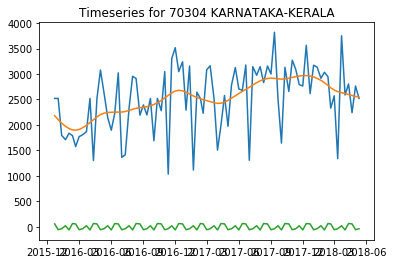

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1040.8247633145384   {'d': 2, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1070.6770079189332   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.94  minutes
              0
72  3051.327500
73  3042.334375
74  3105.117969
75  3190.297461
76  3097.269326
77  3108.754783
78  3125.359885
79  3130.420364
80  3115.451089
81  3119.996530
82  3122.806967
83  3122.168737
84  3120.105831
85  3121.269516
86  3121.587763 15
wma,  AIC:152.13723341204644 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:167.9307380538223
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

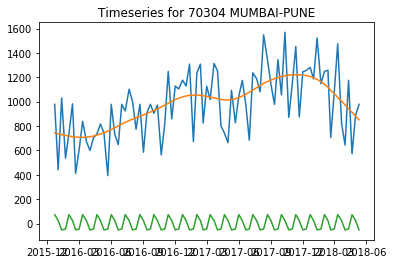

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:899.2449404505699   {'d': 2, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:921.6179253070052   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.88  minutes
              0
72  1206.700000
73  1145.275000
74  1212.968750
75  1205.060937
76  1192.501172
77  1188.951465
78  1199.870581
79  1196.596039
80  1194.479814
81  1194.974475
82  1196.480227
83  1195.632639
84  1195.391789
85  1195.619782
86  1195.781109 15
wma,  AIC:124.76780719194193 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:128.2351247056599
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

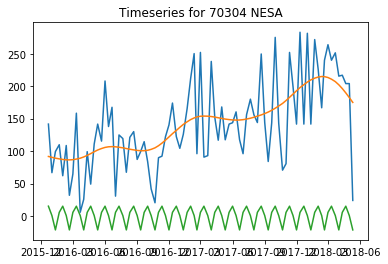

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:724.1891487972887   {'d': 1, 'method': 0, 'p': 2, 'q': 1}
egarch,  AIC:740.2312747524995   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.96  minutes
             0
72  219.006019
73  210.757523
74  213.614404
75  231.619486
76  218.749358
77  218.685193
78  220.667110
79  222.430287
80  220.132987
81  220.478894
82  220.927320
83  220.992372
84  220.632893
85  220.757870
86  220.827614 15
wma,  AIC:91.12356669956854 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:108.04333400839924
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

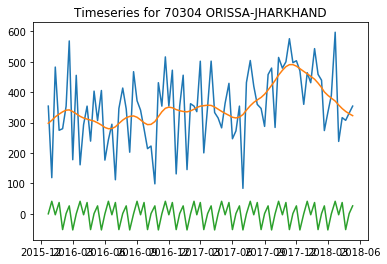

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:833.5504275188697   {'d': 0, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:829.3549979589378   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.86  minutes
             0
72  511.650000
73  495.612500
74  495.265625
75  493.257031
76  498.946289
77  495.770361
78  495.809827
79  495.945877
80  496.618089
81  496.036038
82  496.102458
83  496.175615
84  496.233050
85  496.136790
86  496.161978 15
wma,  AIC:9223372036854775807 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:102.14799928979652
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after tren

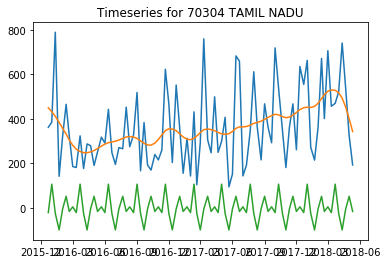

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:861.7608274558677   {'d': 3, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:872.8363116530844   {'method': 0, 'p': 2, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.83  minutes
             0
72  431.995518
73  449.373880
74  444.767349
75  490.509187
76  454.161484
77  459.702975
78  462.285249
79  466.664723
80  460.703608
81  462.339139
82  462.998180
83  463.176412
84  462.304335
85  462.704516
86  462.795861 15
wma,  AIC:122.29289427209216 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:127.80314476536093
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend

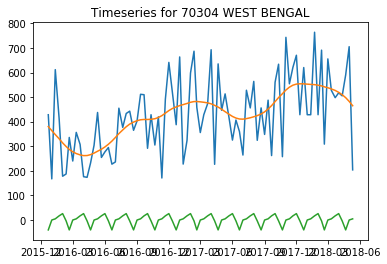

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:844.7950457468351   {'d': 1, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:851.4664502542678   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.95  minutes
             0
72  568.485750
73  572.054688
74  559.818359
75  532.147949
76  558.126687
77  555.536921
78  551.407479
79  549.304759
80  553.593961
81  552.460780
82  551.691745
83  551.762811
84  552.377324
85  552.073165
86  551.976261 15
wma,  AIC:112.2383420645088 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:9223372036854775807
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend

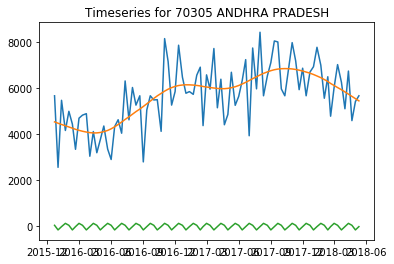

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1117.3009616138675   {'d': 2, 'method': 0, 'p': 3, 'q': 0}
egarch,  AIC:1147.4880623401125   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.87  minutes
              0
72  6420.297812
73  6226.559766
74  6298.324707
75  6154.718384
76  6274.975167
77  6238.644506
78  6241.665691
79  6227.500937
80  6245.696575
81  6238.376927
82  6238.310033
83  6237.471118
84  6239.963663
85  6238.530435
86  6238.568812 15
wma,  AIC:166.79251216340174 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:9223372036854775807
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted

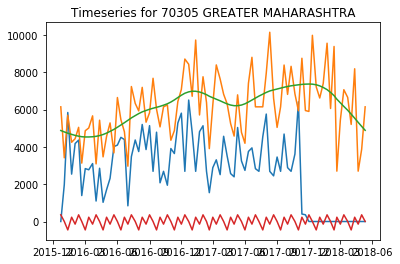

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1161.379038412191   {'d': 1, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1185.0477145700531   {'method': 0, 'p': 3, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.86  minutes
              0
72  7645.875000
73  7369.343750
74  7724.492188
75  8180.427734
76  7730.034668
77  7751.074585
78  7846.507294
79  7877.011070
80  7801.156904
81  7818.937463
82  7835.903183
83  7833.252155
84  7822.312426
85  7827.601307
86  7829.767268 15
wma,  AIC:199.63372394031995 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:207.02729878827546
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

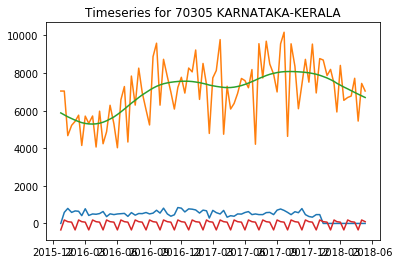

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1149.221776637517   {'d': 1, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1186.2267897750696   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.83  minutes
              0
72  8297.462500
73  8521.890625
74  8469.863281
75  8707.891602
76  8499.277002
77  8549.730627
78  8556.690628
79  8578.397465
80  8546.023931
81  8557.710663
82  8559.705672
83  8560.459432
84  8555.974924
85  8558.462673
86  8558.650675 15
wma,  AIC:179.3128444062707 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:194.1769937838442
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

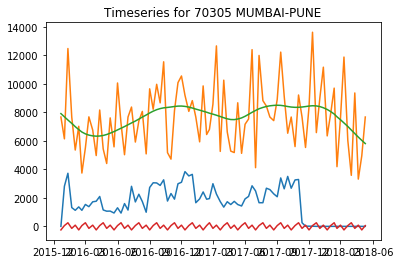

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1209.383579673504   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1248.3204425551503   {'method': 0, 'p': 2, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.99  minutes
               0
72   8800.849557
73   9083.724889
74   9971.406112
75  10368.070139
76   9556.012674
77   9744.803454
78   9910.073095
79   9894.739841
80   9776.407266
81   9831.505914
82   9853.181529
83   9838.958637
84   9825.013336
85   9837.164854
86   9838.579589 15
wma,  AIC:223.85588014185035 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:220.19212053737056
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timese

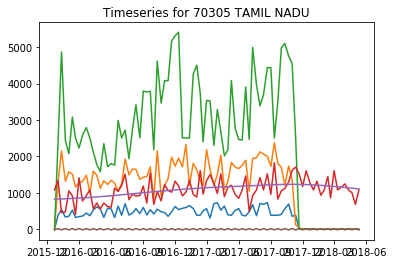

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:949.1139780555822   {'d': 1, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:974.3909978458498   {'method': 0, 'p': 0, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.9  minutes
              0
72  1500.212500
73  1448.390625
74  1432.150781
75  1496.500977
76  1469.313721
77  1461.589026
78  1464.888626
79  1473.073087
80  1467.216115
81  1466.691714
82  1467.967385
83  1468.737075
84  1467.653072
85  1467.762312
86  1468.029961 15
wma,  AIC:129.77823947376066 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:147.35432521170156
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

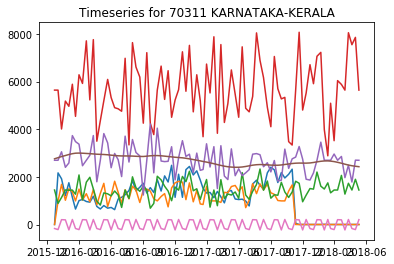

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1035.8292622517301   {'d': 1, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:1064.8209996607816   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.82  minutes
              0
72  2686.375000
73  2650.593750
74  2495.117188
75  2432.896484
76  2566.245605
77  2536.213257
78  2507.618134
79  2510.743370
80  2530.205091
81  2521.194963
82  2517.440390
83  2519.895954
84  2522.184099
85  2520.178851
86  2519.924823 15
wma,  AIC:169.41203639504454 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:159.87734524043393
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

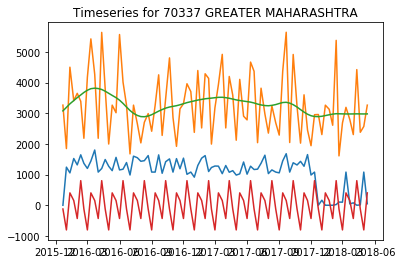

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1105.4662715457105   {'d': 1, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:1122.9006134525075   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.89  minutes
              0
72  2735.750000
73  2519.687500
74  2537.109375
75  2686.136719
76  2619.670898
77  2590.651123
78  2608.392029
79  2626.212692
80  2611.231686
81  2609.121882
82  2613.739572
83  2615.076458
84  2612.292400
85  2612.557578
86  2613.416502 15
wma,  AIC:164.03468826611905 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:131.72522378843405
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted 

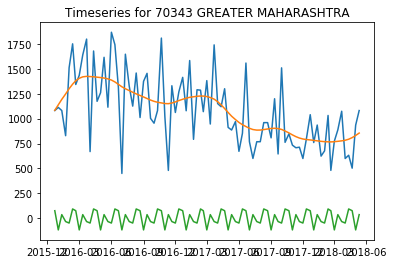

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:955.7972733772925   {'d': 2, 'method': 0, 'p': 3, 'q': 2}
egarch,  AIC:973.3876849252111   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.87  minutes
             0
72  704.050000
73  703.237500
74  700.796875
75  726.146094
76  708.557617
77  709.684521
78  711.296277
79  713.921127
80  710.864886
81  711.441703
82  711.880998
83  712.027179
84  711.553691
85  711.725893
86  711.796940 15
wma,  AIC:98.80181220559106 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:129.02164578514373
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

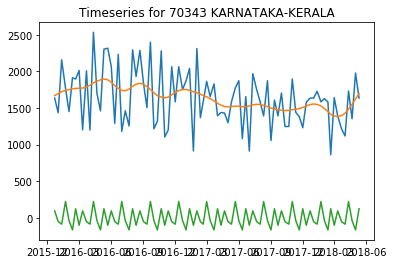

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:983.8694116909431   {'d': 1, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:996.0248386603058   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.92  minutes
              0
72  1407.300000
73  1399.150000
74  1403.612500
75  1446.865625
76  1414.232031
77  1415.965039
78  1420.168799
79  1424.307874
80  1418.668436
81  1419.777537
82  1420.730661
83  1420.871127
84  1420.011940
85  1420.347816
86  1420.490386 15
wma,  AIC:117.60345712930696 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:81.15465124553512
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

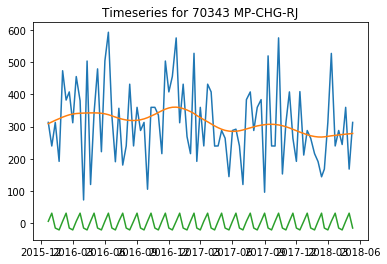

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:822.1634660092071   {'d': 1, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:867.5010323629491   {'method': 0, 'p': 0, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.77  minutes
             0
72  318.225000
73  295.781250
74  303.726562
75  331.658203
76  312.347754
77  310.878442
78  314.652740
79  317.384285
80  313.815805
81  314.182818
82  315.008912
83  315.097955
84  314.526373
85  314.704015
86  314.834314 15
wma,  AIC:107.11441717640841 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:96.33833601431778
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend 

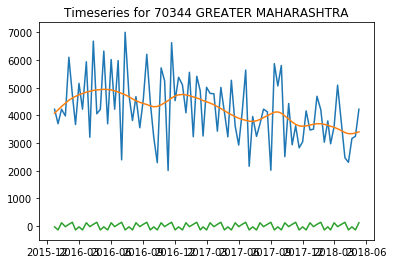

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1136.04416637579   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1166.0501988894405   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.98  minutes
              0
72  3414.250000
73  3361.937500
74  3495.484375
75  3608.042969
76  3469.928711
77  3483.848389
78  3514.326111
79  3519.036545
80  3496.784939
81  3503.498996
82  3508.411648
83  3506.933032
84  3503.907153
85  3505.687707
86  3506.234885 15
wma,  AIC:165.66234292246455 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:83.31731153387267
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted ser

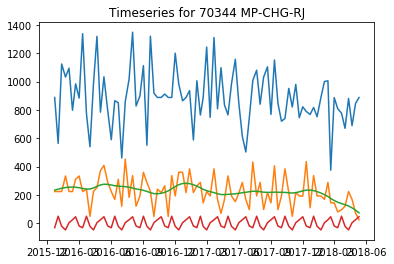

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:803.3921595752395   {'d': 2, 'method': 0, 'p': 2, 'q': 3}
egarch,  AIC:821.0302102043235   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.83  minutes
             0
72  258.437500
73  269.046875
74  288.308594
75  312.635742
76  282.107178
77  288.024597
78  292.769028
79  293.884136
80  289.196235
81  290.968499
82  291.704474
83  291.438336
84  290.826886
85  291.234549
86  291.301061 15
wma,  AIC:120.93971721551453 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:120.07693254766446
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted series after trend

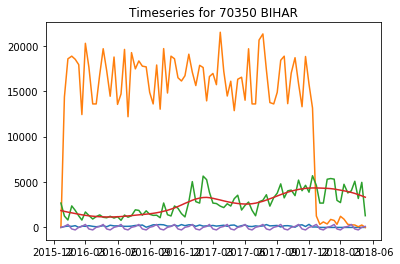

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1088.1517012569102   {'d': 1, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:1080.9268546086005   {'method': 0, 'p': 2, 'q': 3}
Time for tuning models of BENCH_HYPEROPT_1:  0.85  minutes
              0
72  4564.985000
73  4694.641250
74  4708.016562
75  4915.470703
76  4720.778379
77  4759.726724
78  4775.998092
79  4792.993474
80  4762.374167
81  4772.773114
82  4776.034712
83  4776.043867
84  4771.806465
85  4774.164540
86  4774.512396 15
wma,  AIC:174.9320121129107 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:199.80111057308585
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

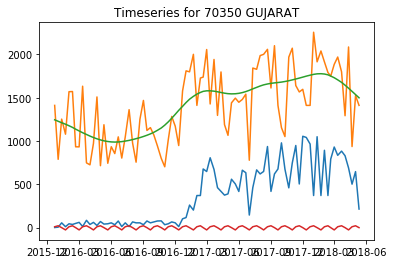

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:968.5016314653896   {'d': 1, 'method': 0, 'p': 3, 'q': 1}
egarch,  AIC:989.0596073600623   {'method': 0, 'p': 3, 'q': 1}
Time for tuning models of BENCH_HYPEROPT_1:  0.78  minutes
              0
72  1554.159938
73  1532.444923
74  1523.843654
75  1505.474567
76  1528.980770
77  1522.685978
78  1520.246242
79  1519.346890
80  1522.814970
81  1521.273520
82  1520.920406
83  1521.088946
84  1521.524461
85  1521.201833
86  1521.183911 15
wma,  AIC:115.82621118761271 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:9223372036854775807
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

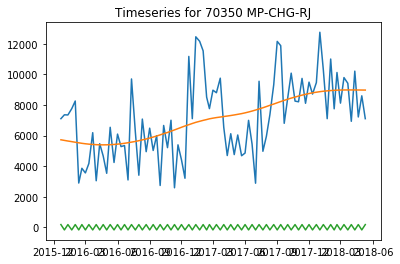

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1203.4748199977105   {'d': 2, 'method': 0, 'p': 1, 'q': 3}
egarch,  AIC:1256.7371802477276   {'method': 0, 'p': 3, 'q': 2}
Time for tuning models of BENCH_HYPEROPT_1:  0.92  minutes
              0
72  9009.970000
73  8828.882500
74  9009.470625
75  8889.468281
76  8934.447852
77  8915.567314
78  8937.238518
79  8919.180491
80  8926.608544
81  8924.648717
82  8926.919068
83  8924.339205
84  8925.628883
85  8925.383968
86  8925.567781 15
wma,  AIC:158.8869908890137 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:180.97892880321643
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of timeseries
predicted s

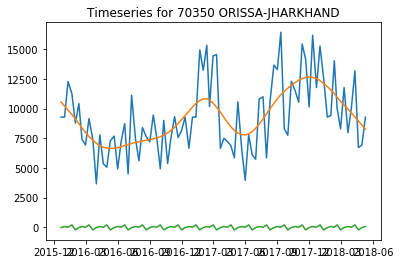

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1212.0985095237156   {'d': 2, 'method': 0, 'p': 3, 'q': 3}
egarch,  AIC:1259.5340592323926   {'method': 0, 'p': 3, 'q': 0}
Time for tuning models of BENCH_HYPEROPT_1:  0.89  minutes
               0
72  13971.267500
73  13605.079375
74  13468.539219
75  14302.489023
76  13836.843779
77  13803.237849
78  13852.777468
79  13948.837030
80  13860.424031
81  13866.319095
82  13882.089406
83  13889.417390
84  13874.562481
85  13878.097093
86  13881.041592 15
wma,  AIC:201.86358574545164 Averaging order 4
naive,  AIC:9223372036854775807
drift,  AIC:224.61604632593713
Time for tuning models of BENCH_HYPEROPT_2:  0.0  minutes
You are in forecasting module functionlaity select_model part
model name  arima
You are in seasonal_trend module calculating all components of times

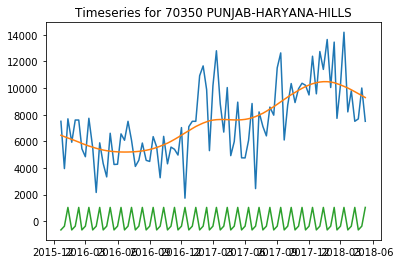

You are here in forecasting module preparing datasets for different models
You are in seasonal_trend module calculating all components of timeseries
You are in forecasting module functionality parameter tuning part
arima,  AIC:1200.0524728674902   {'d': 1, 'method': 0, 'p': 3, 'q': 3}


In [ ]:
bucket = pd.DataFrame()
df = df.iloc[:, :200]
ERR_overall_den, ERR_overall_den_1, ERR_overall_den_2 = 0, 0, 0
ERR_overall_num, ERR_overall_num_1, ERR_overall_num_2 = 0, 0, 0
for i in range(df.shape[1]):
    try:
        # Columns to timeseries
        column_name = df.columns[i]
        df.rename(columns={column_name: "timeseries"}, inplace=True)
        temp = pd.DataFrame(df.iloc[:,i])
        temp = temp.fillna(method='pad')

        # Forecasting individual columns and initialization of parameters
        factor = 0.83
        evals = 5
        ensemble_metric = 'unlr'
        steps = len(df) - int(factor*len(df))
        obj = forecasting(temp, factor, steps, evals, ensemble_metric)

        # Outlier Detection and Missing value Imputation
        obj.outlier()
        obj_1 = DataImputation(obj.timeseries)
        obj_1.meanInpute()

        # Plotting and storing timeseries
        obj.timeseries = obj_1.timeseries
        obj.timeseries.index = df.index
        df[:][str(i)] = obj.timeseries
        plt.subplot()
        plt.plot(obj.timeseries)
        plt.title('Timeseries for '+str(column_name))

        # Peridicity calculation
        obj_2 = frequency_estimator(obj.timeseries)
        periodicity = obj_2.periodicity_estimator()

        # Decomposition and Hyperparameter tuning
        obj_3 = SeasonalityDetection(obj.timeseries, periodicity)
        obj_3.trend_seasonal_comp()
        obj_3.plot_trend_seasonal_comp('hp', 'add_decomp')
        obj.dataset('hp', 'add_decomp', periodicity)
        obj.parameter_tuning(periodicity)

        # Model tuning and selection
        model, name, ERR, ERR_1, ERR_2, ensembled_pred_df = obj.select_model(periodicity)
        ensembled_pred_df.to_csv('Time_Series_Analysis.csv', header = [column_name])
        if ( str(name) not in ['wma', 'naive', 'drift', 'Linear_Holt_Winter', 'Additive_Holt_Winter', 'Multiplicative_Holt_Winter']):
            bucket[column_name] = model.predict( h = int( (1-factor)*len(df) + 5) )[-steps:]
        else:
            bucket[column_name] = name
        df.rename(columns={"timeseries" : column_name}, inplace=True)
        print("bucket", column_name, "\n", bucket[column_name])

        # Overall Accuracy using Unilever metric
        ERR_overall_den = ERR_overall_den + np.sum(np.array(temp).flatten())
        ERR_overall_num = ERR_overall_num + (1-ERR)*np.sum(np.array(temp).flatten())
        ERR_overall = 1 - (ERR_overall_num/ERR_overall_den)

        ERR_overall_den_1 = ERR_overall_den_1 + np.sum(np.array(temp).flatten())
        ERR_overall_num_1 = ERR_overall_num_1 + (1-ERR_1)*np.sum(np.array(temp).flatten())
        ERR_overall_1 = 1 - (ERR_overall_num_1/ERR_overall_den_1)

        ERR_overall_den_2 = ERR_overall_den_2 + np.sum(np.array(temp).flatten())
        ERR_overall_num_2 = ERR_overall_num_2 + (1-ERR_2)*np.sum(np.array(temp).flatten())
        ERR_overall_2 = 1 - (ERR_overall_num_2/ERR_overall_den_2)
    except:
        pass
    
print('Final Cluster Level accuracy_measure : ' + str(ERR_overall))
print('Final Cluster Level accuracy_measure tdp_(t+5:t+7): ' + str(ERR_overall_1))
print('Final accuracy_measure tdp_(t+8:t+10): ' + str(ERR_overall_2))

bucket = pd.DataFrame(bucket)
print("bucket", bucket)
bucket.to_csv('Prediction Results Unilever')